In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
##그래프의 결과를 출력 세션에 나타나게 하자
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [2]:
data = pd.read_csv('3.세종시_아파트(매매)_실거래가.csv')

### 아파트 계약년월일 기준 오름차순

In [3]:
#읍면동 구분하는 함수
def sort_dong(df):
    a=df.split(" ")
    if a[1][-1]=='동':
        return '동'
    elif a[1][-1]=='면':
        return '면'
    else :
        return '읍'
#동 구분하는 함수
def sort_dong2(df):
    a=df.split(" ")
    return a[1]
#년도 추출
def year(df):
    return df[:-2]
#평수 분해
def pyeong(df):
    if df< 33:
        return '10평 미만'
    elif df>= 33 and df < 66:
        return '10~20평'
    elif df>= 66 and df < 99:
        return '20~30평'
    elif df>= 99 and df < 132:
        return '30~40평'
    elif df>= 132 and df < 165:
        return '40~50평'
    elif df>= 165 and df < 198:
        return '50~60평'
    else:
        return '60평 이상'
def mon(df):
    return df[-2:]
def pyeong2(df):
    return int(df/3.3)
def riri(df):
    return int(float(df.replace(',','')))
def rep(df):
    if df == '-':
        return 0
    elif df.find('m이상') != -1:
        return df.replace('m이상','')
    else:
        return df.replace('m미만','')

In [4]:
data['읍면동구분']=data['시군구'].apply(sort_dong)
data['읍면동']=data['시군구'].apply(sort_dong2)

In [ ]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['평']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'평별 매매평균 금액'
    plt.title(a)
    plt.savefig(a+'.png')

<ipython-input-7-602edca1e91a>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


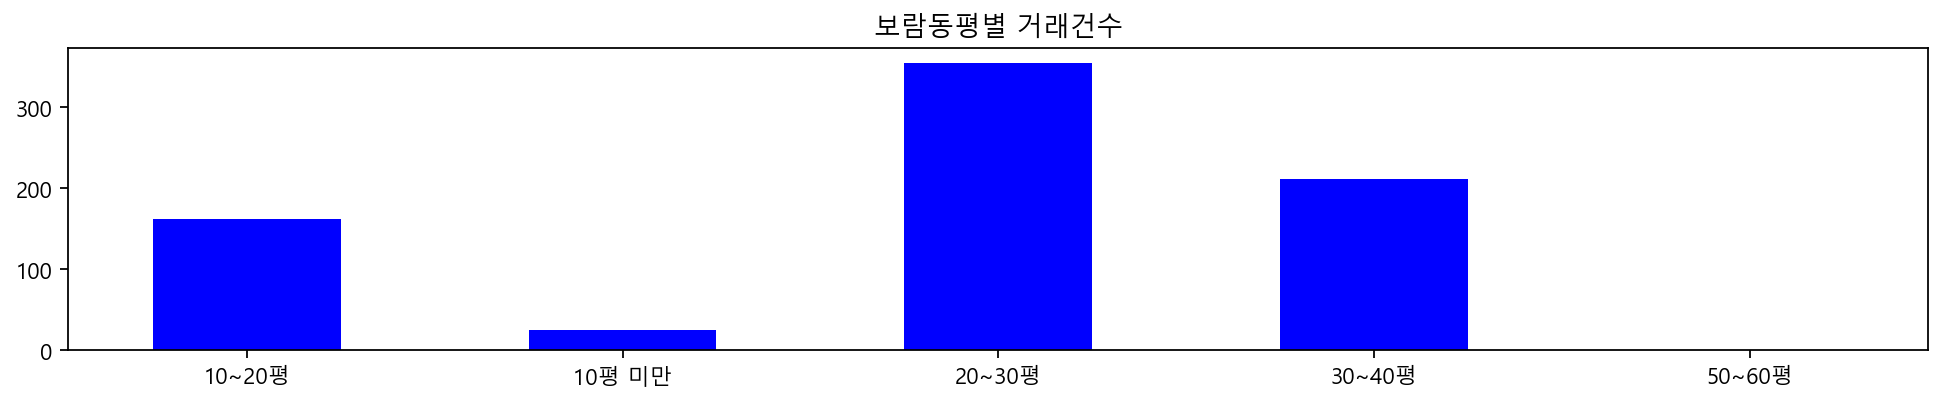

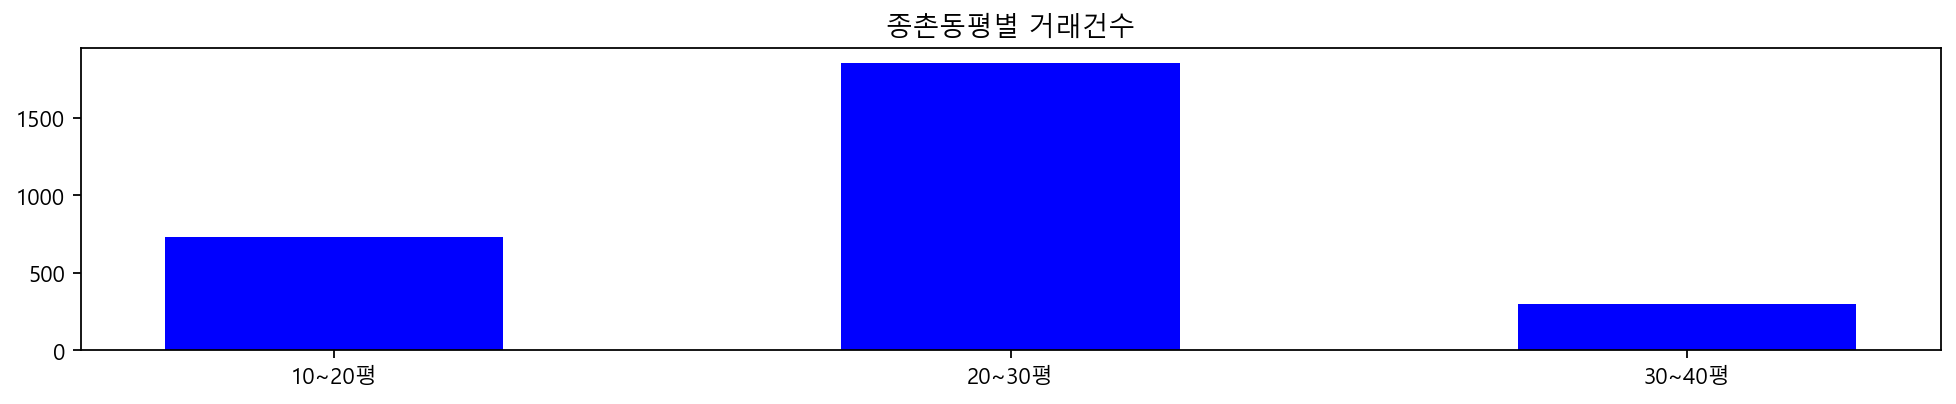

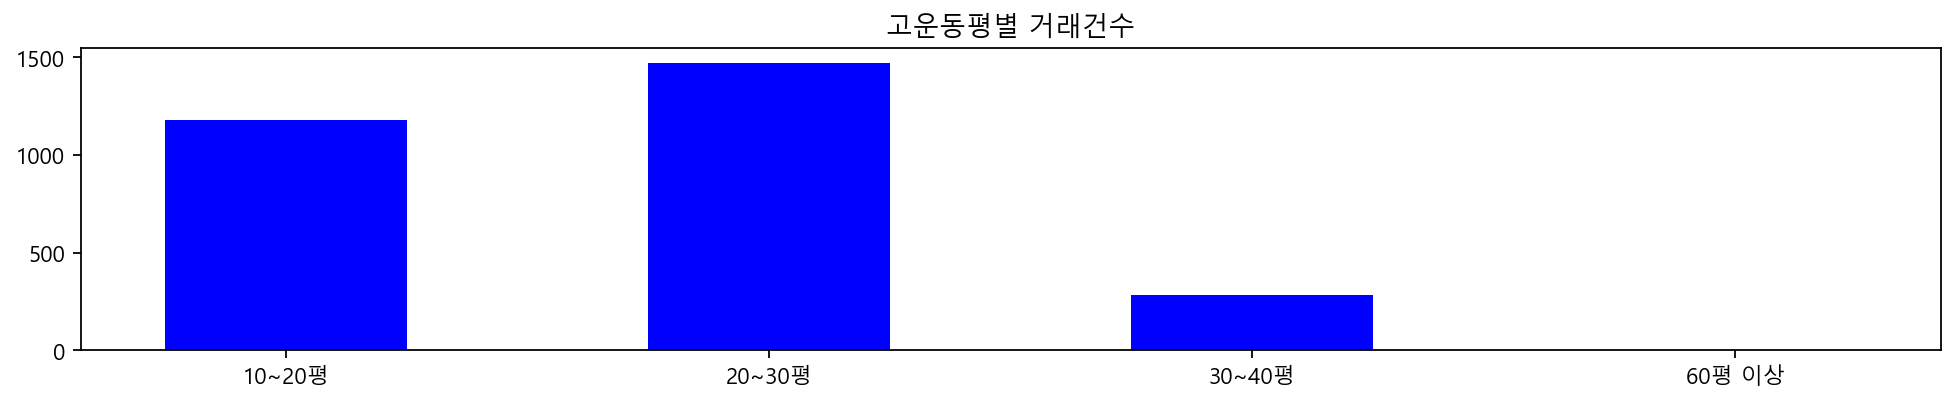

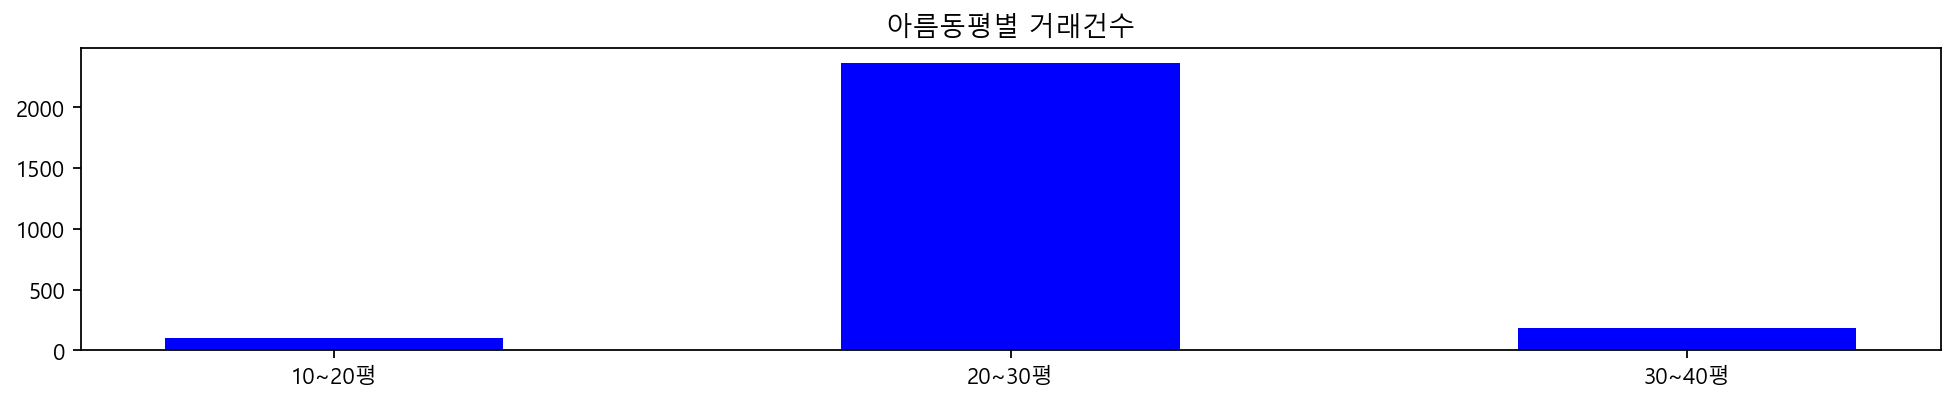

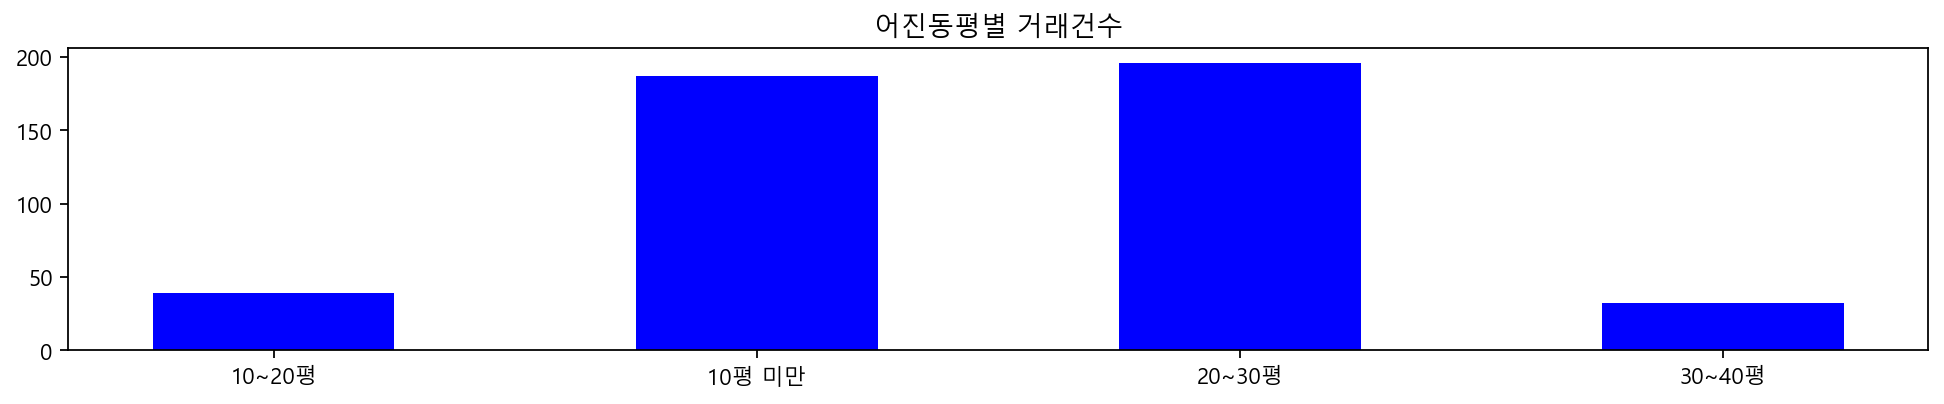

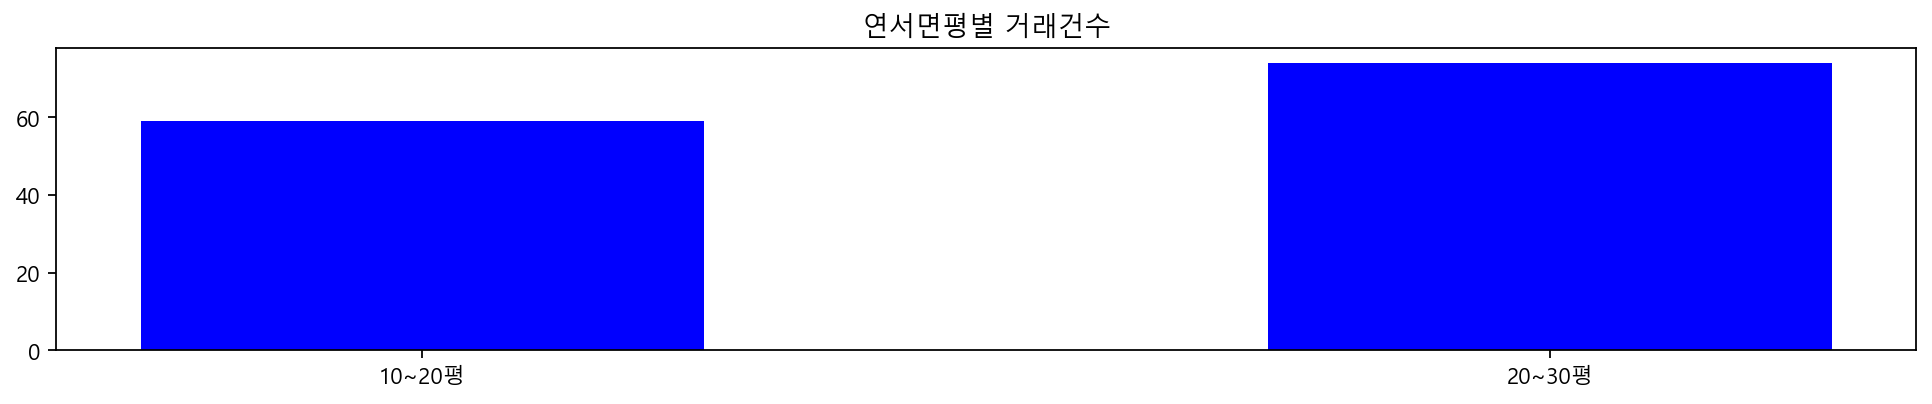

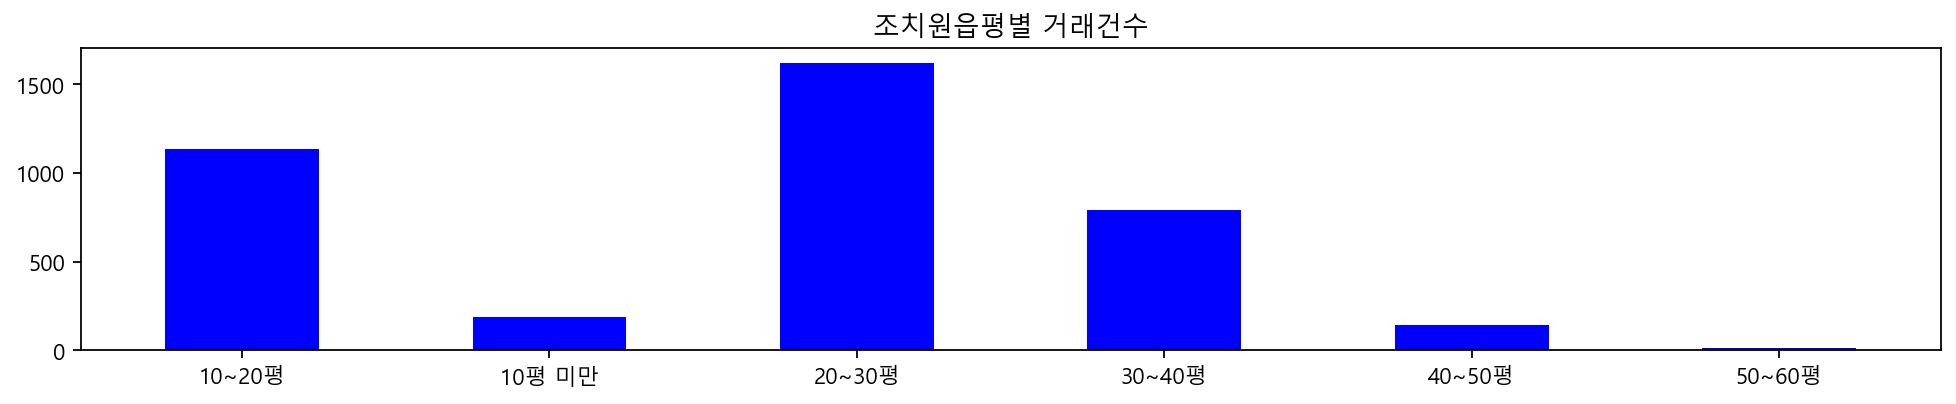

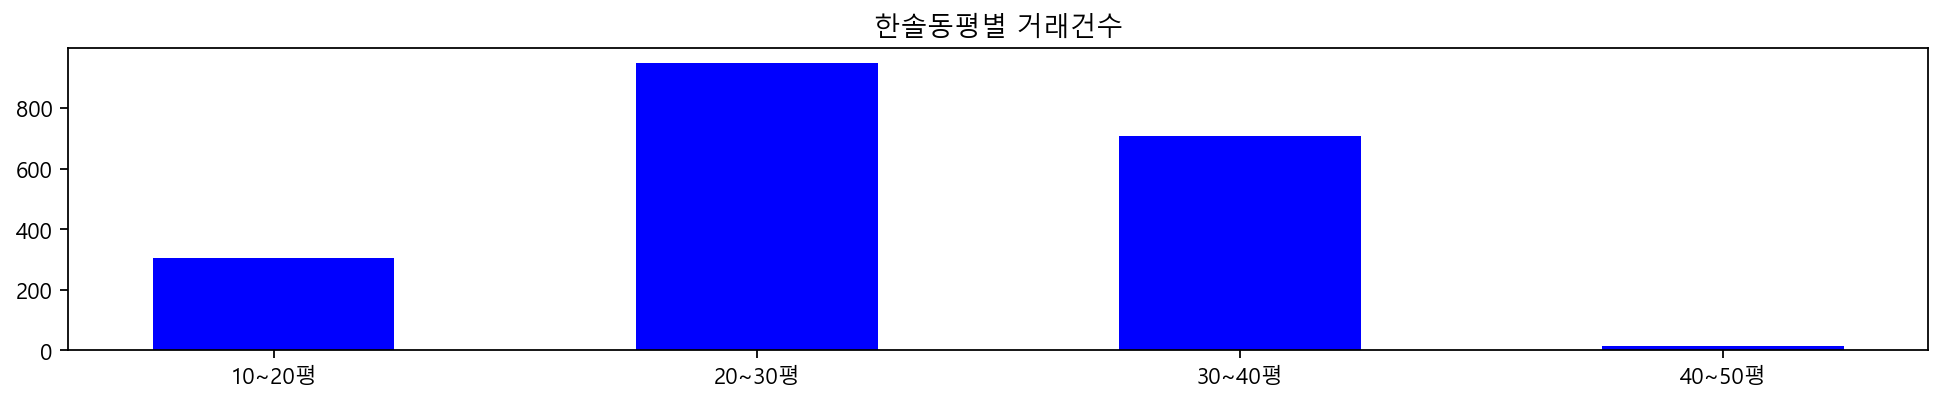

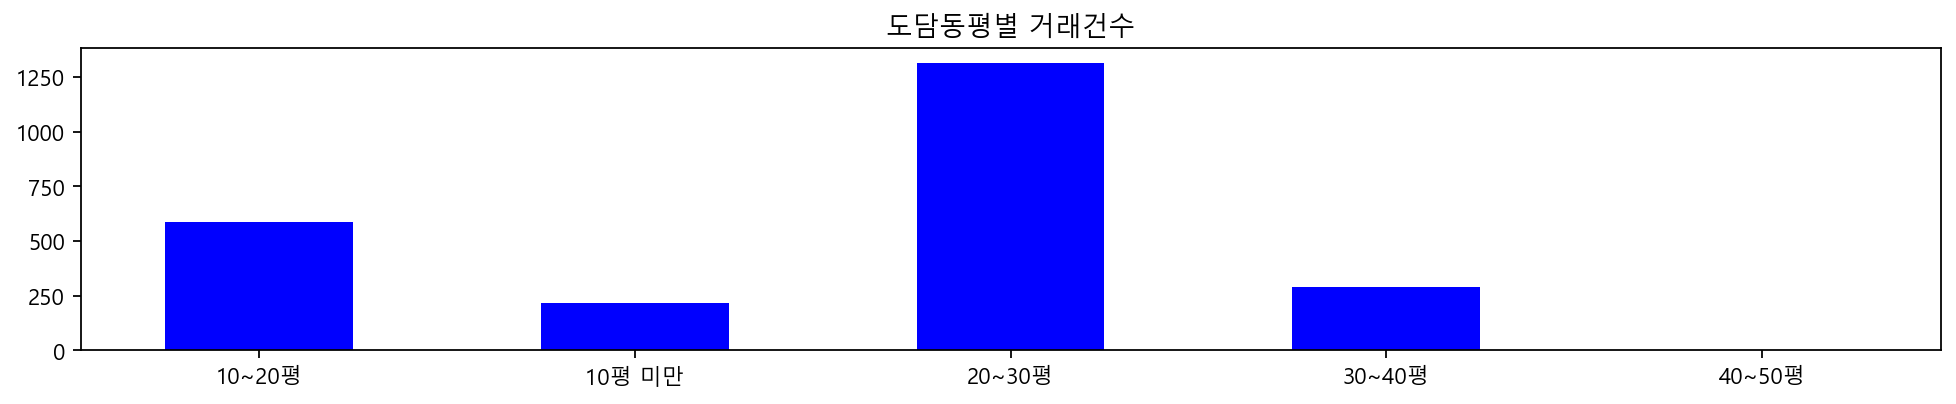

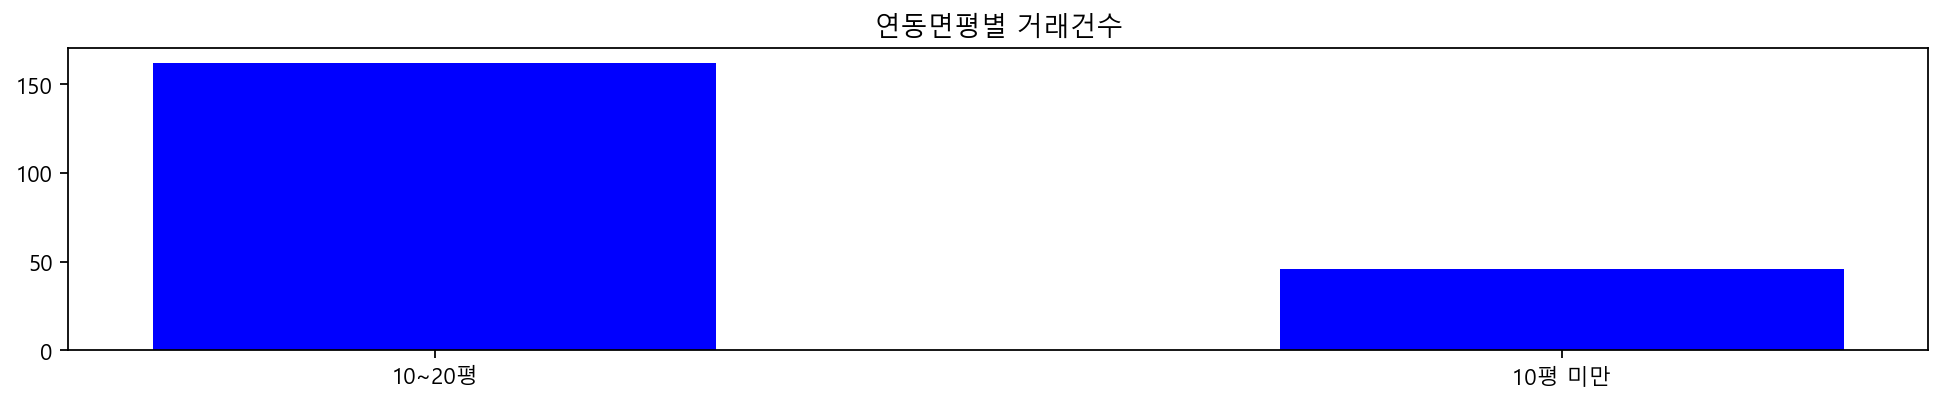

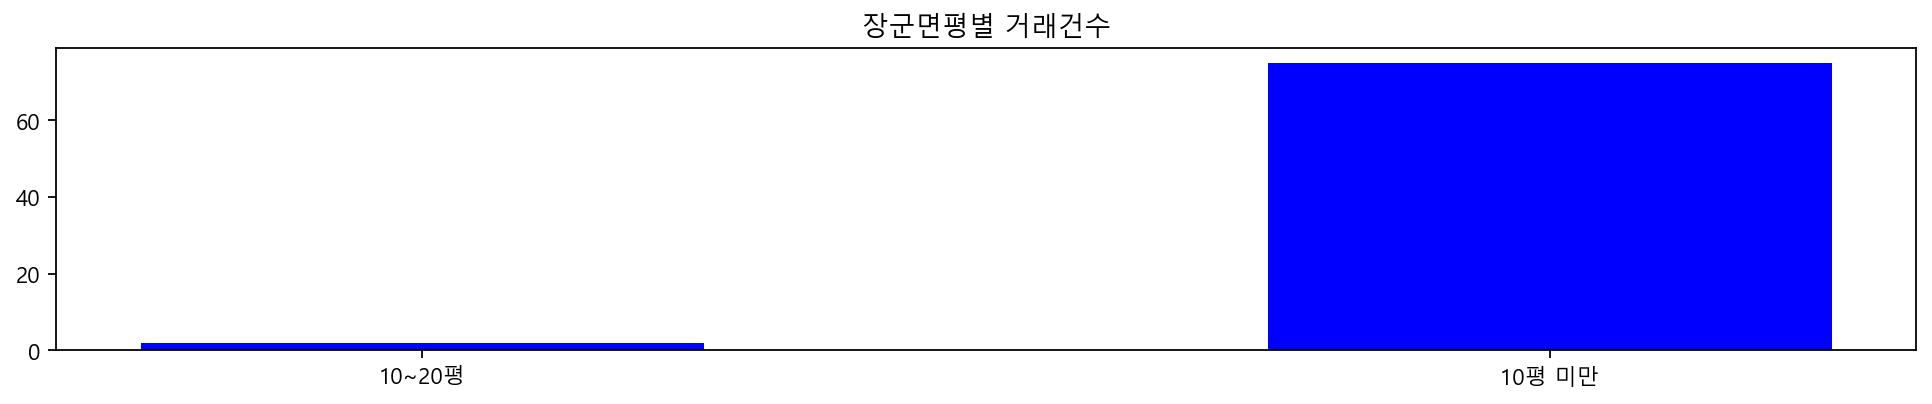

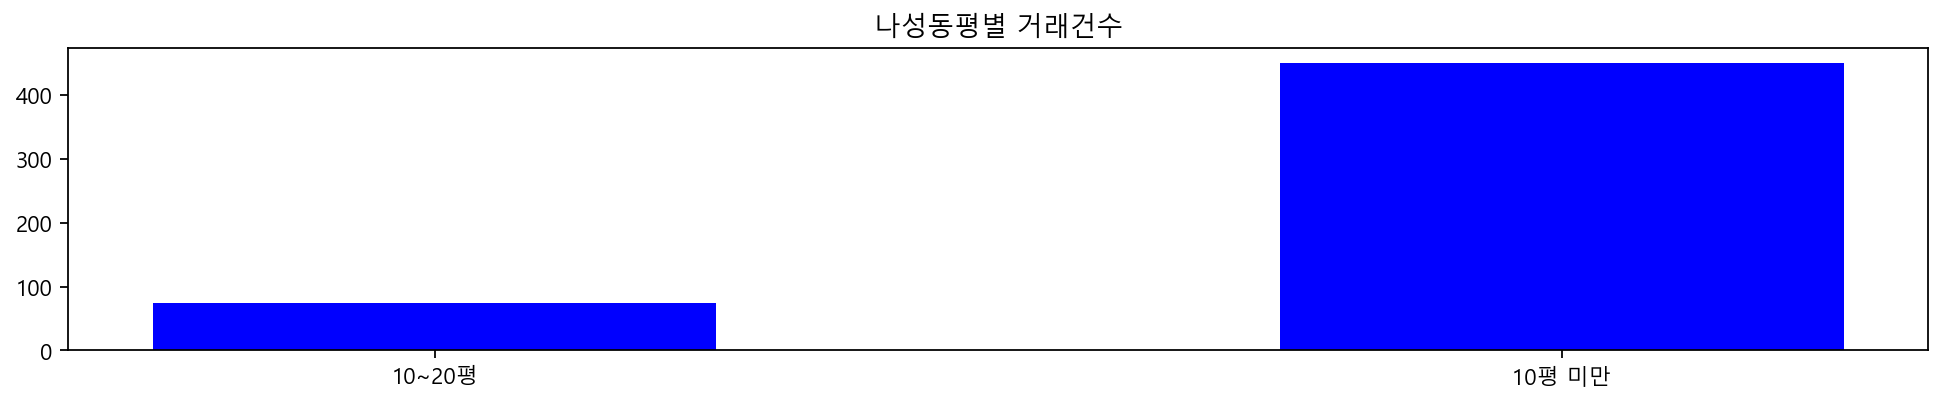

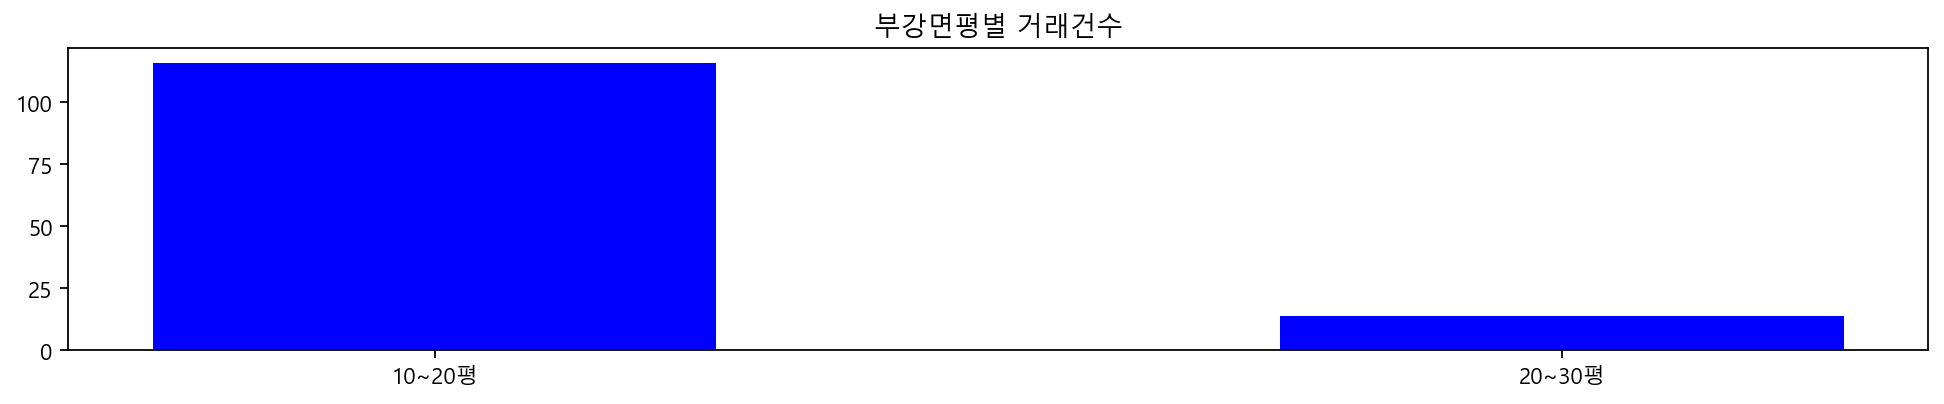

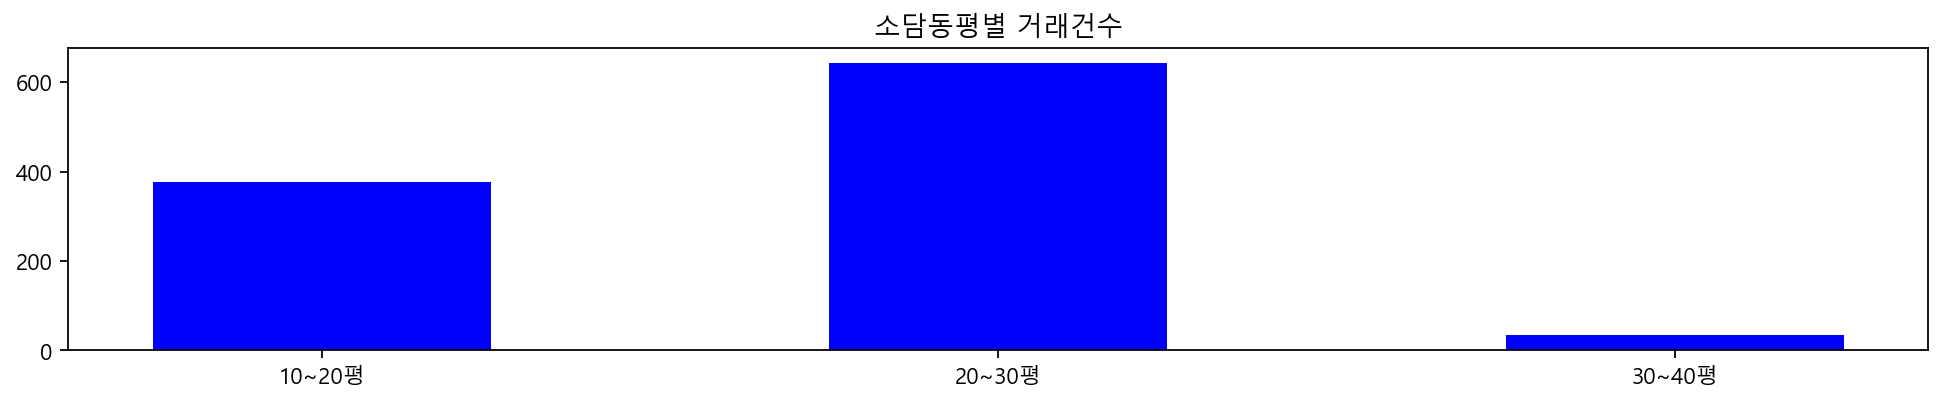

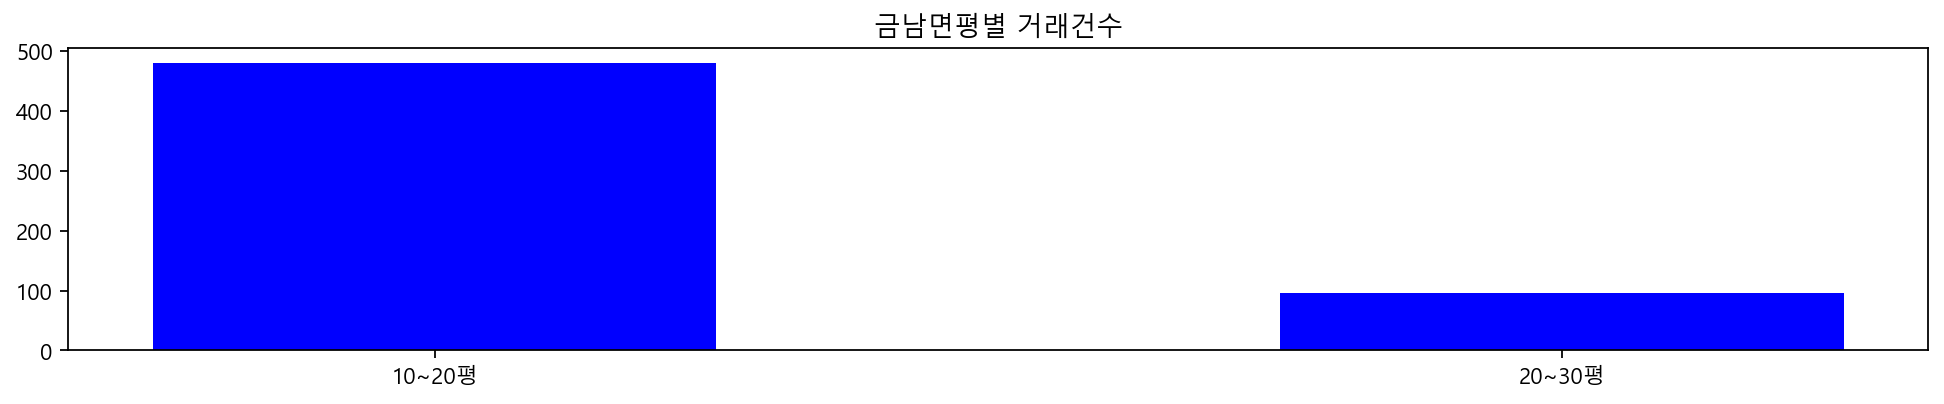

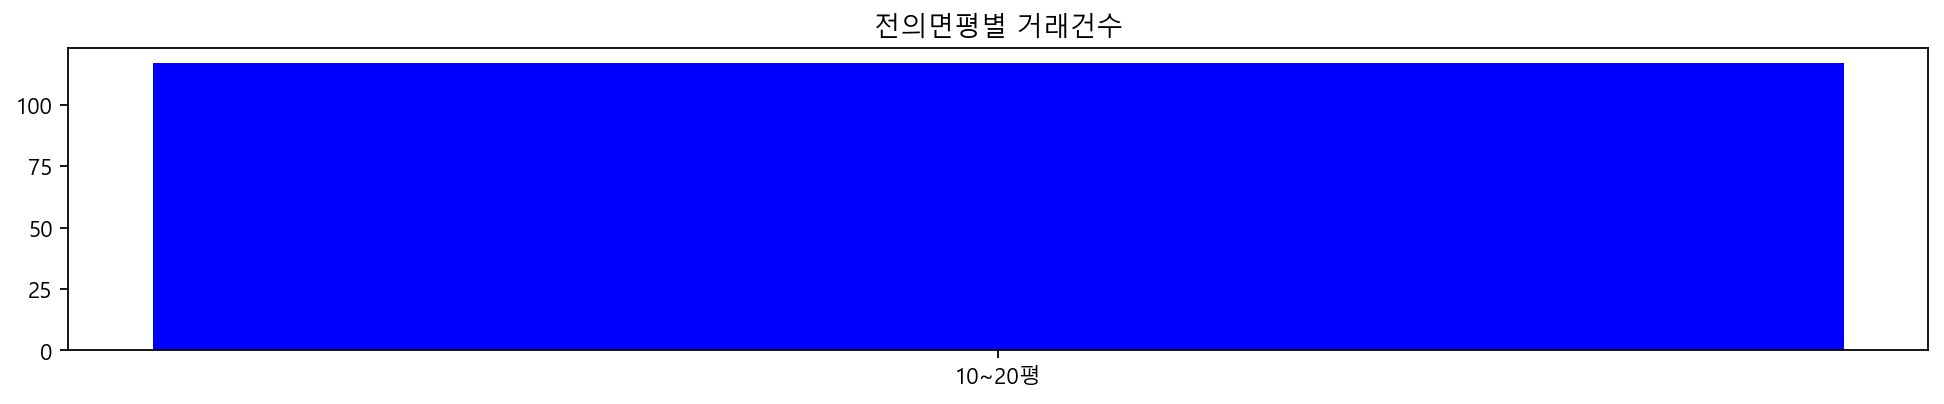

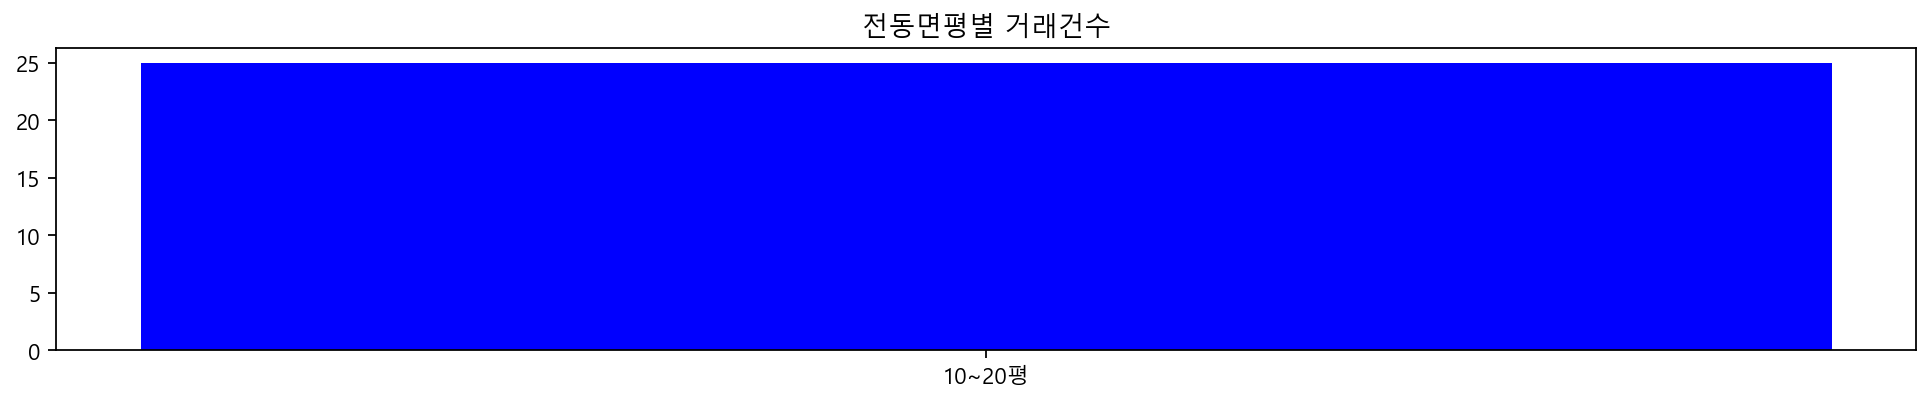

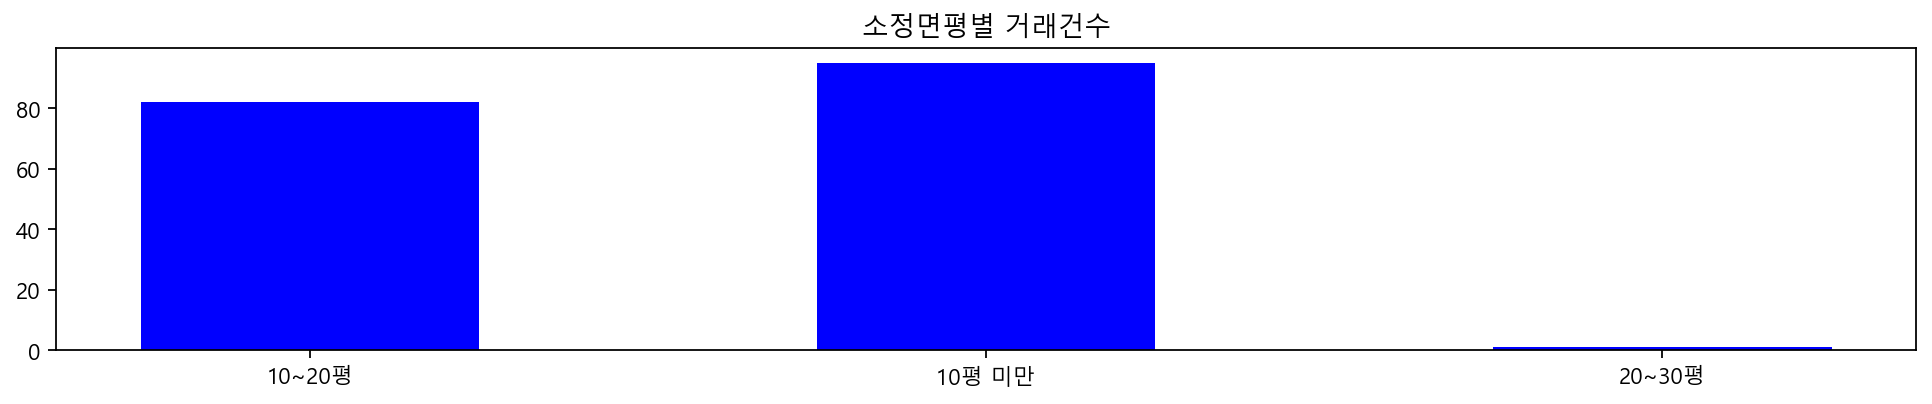

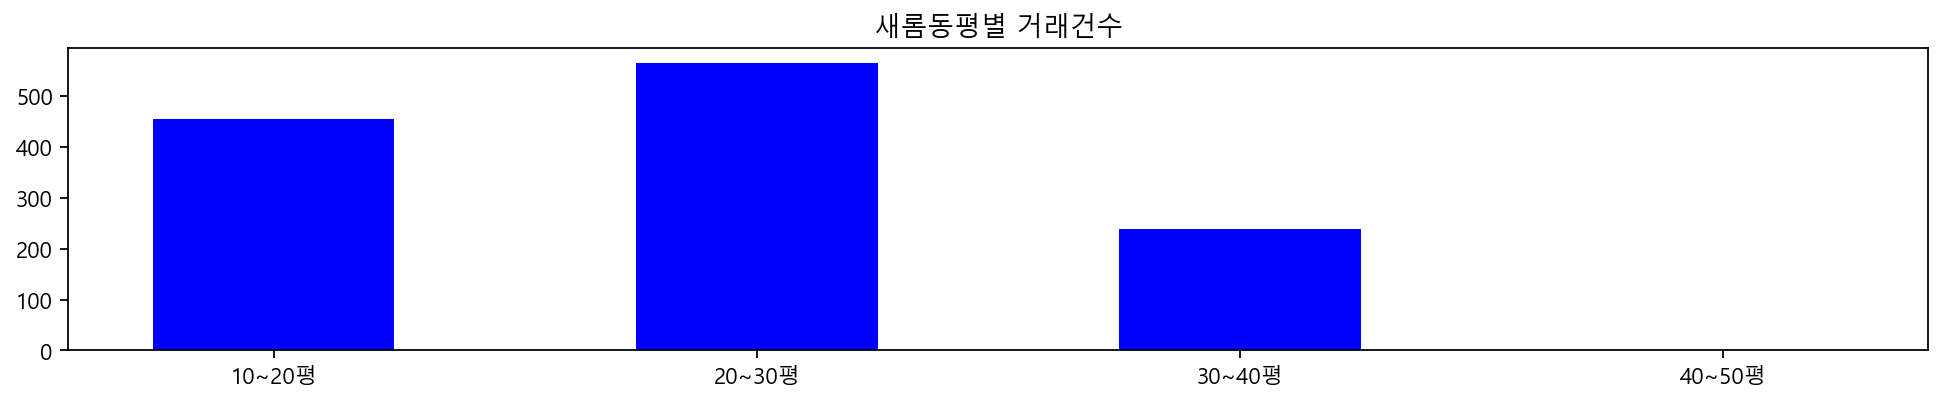

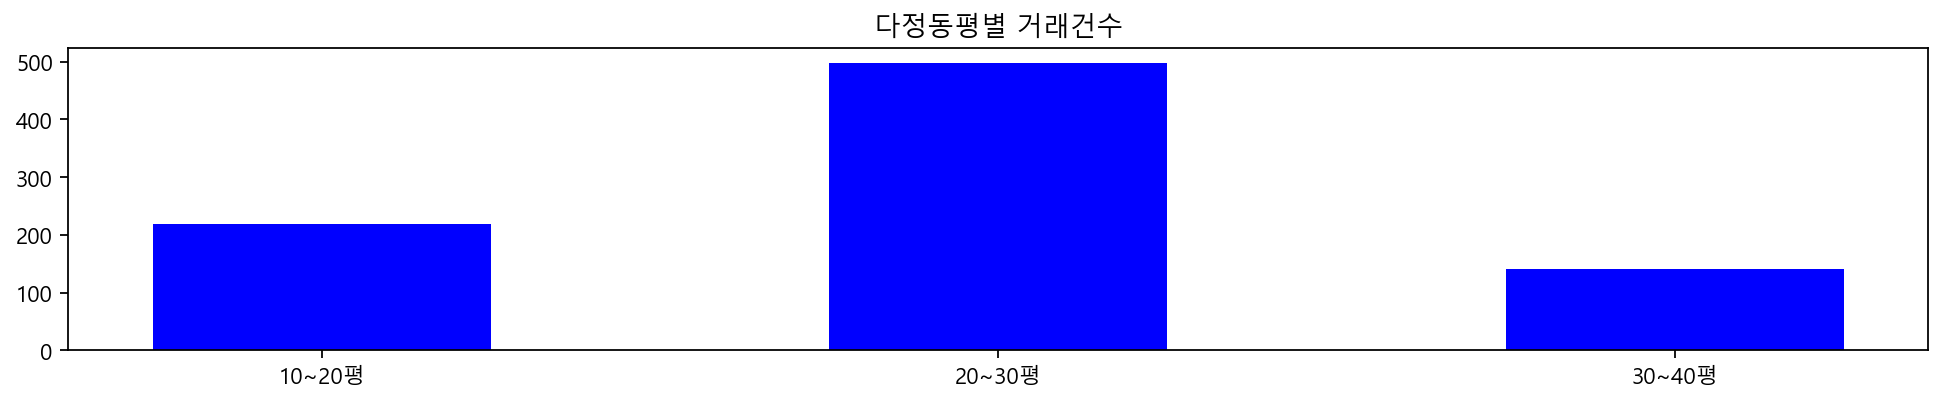

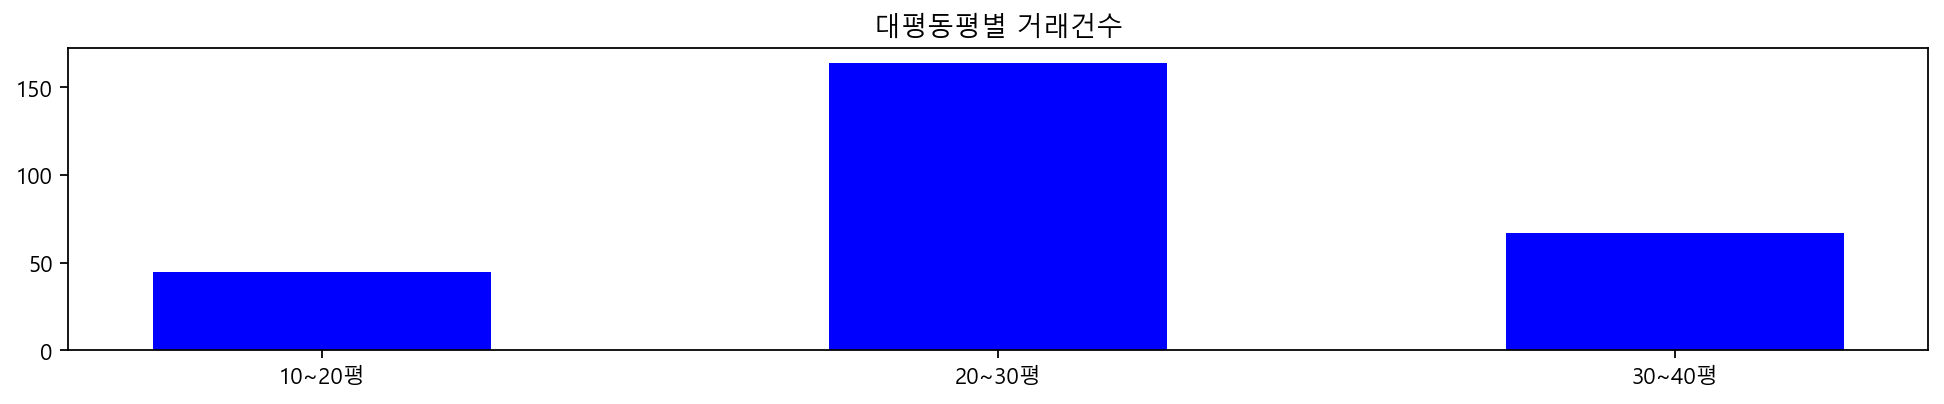

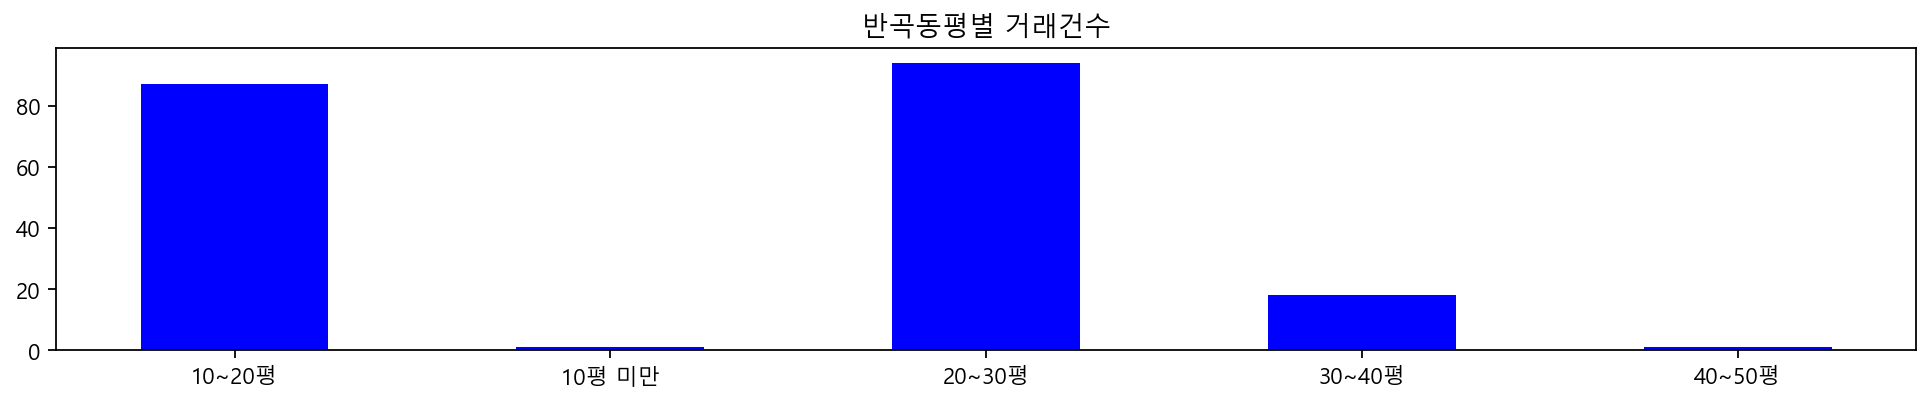

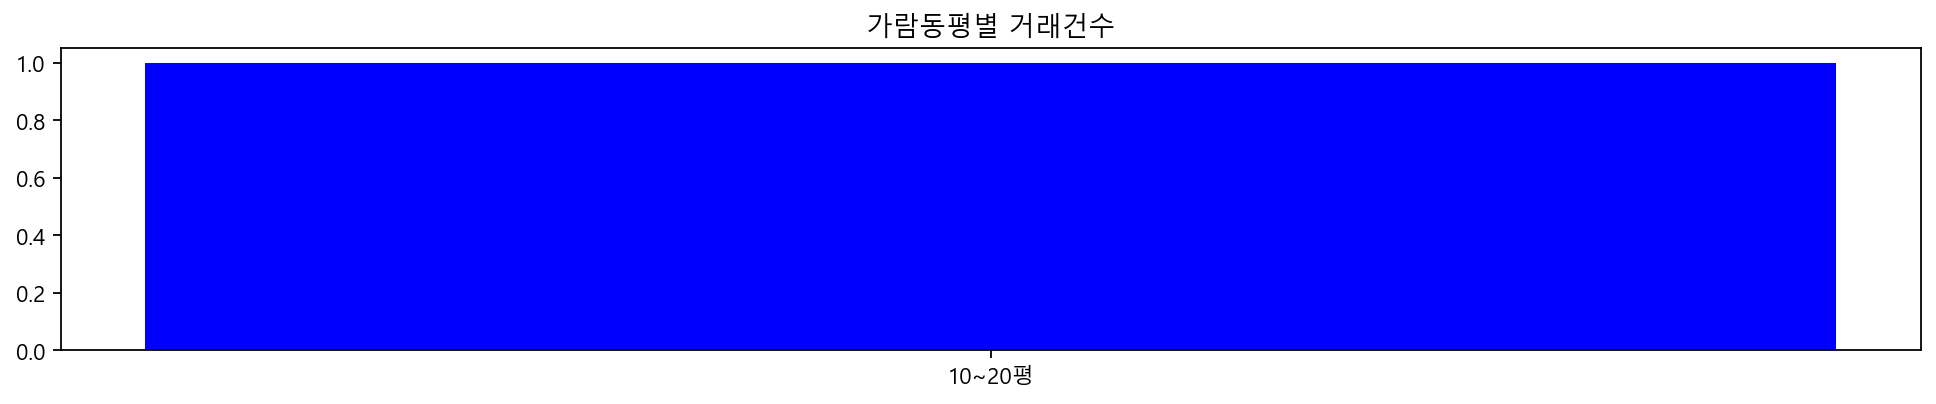

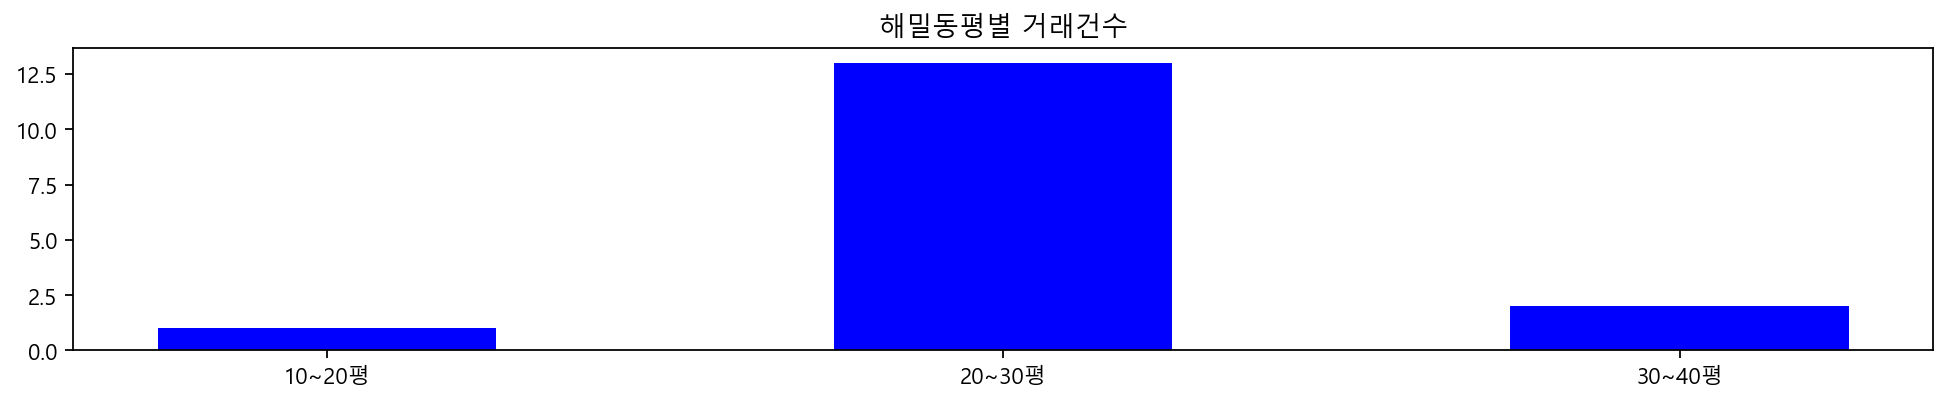

In [7]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['평']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'평별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

<ipython-input-9-ff348b9f4665>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


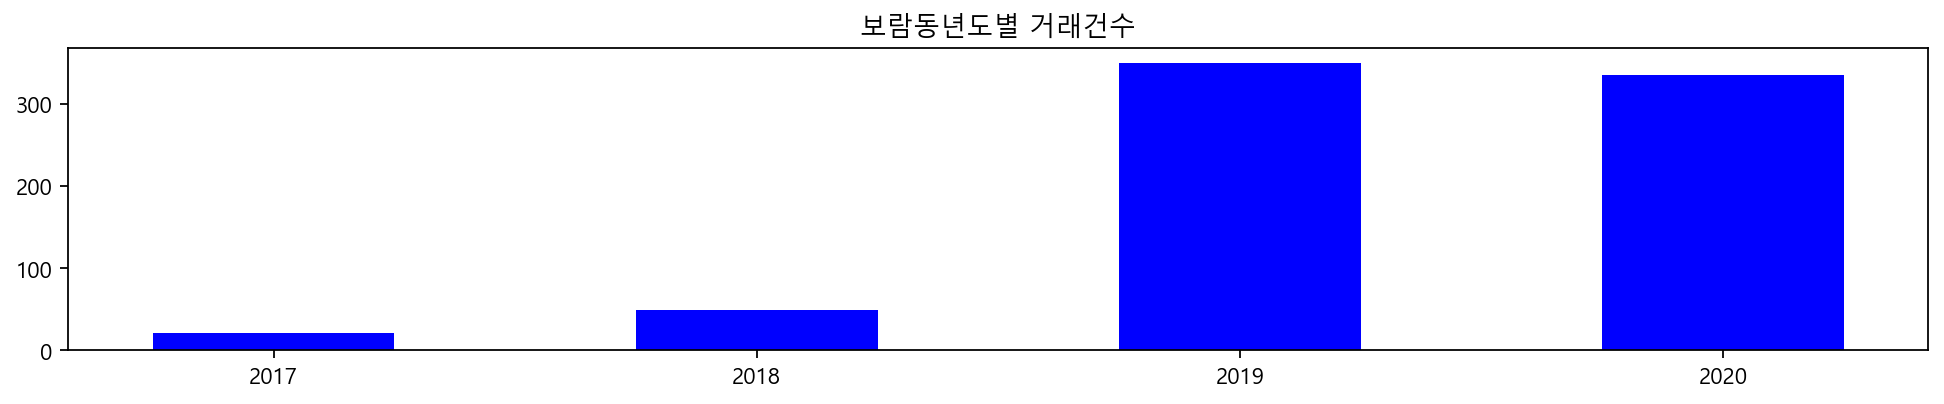

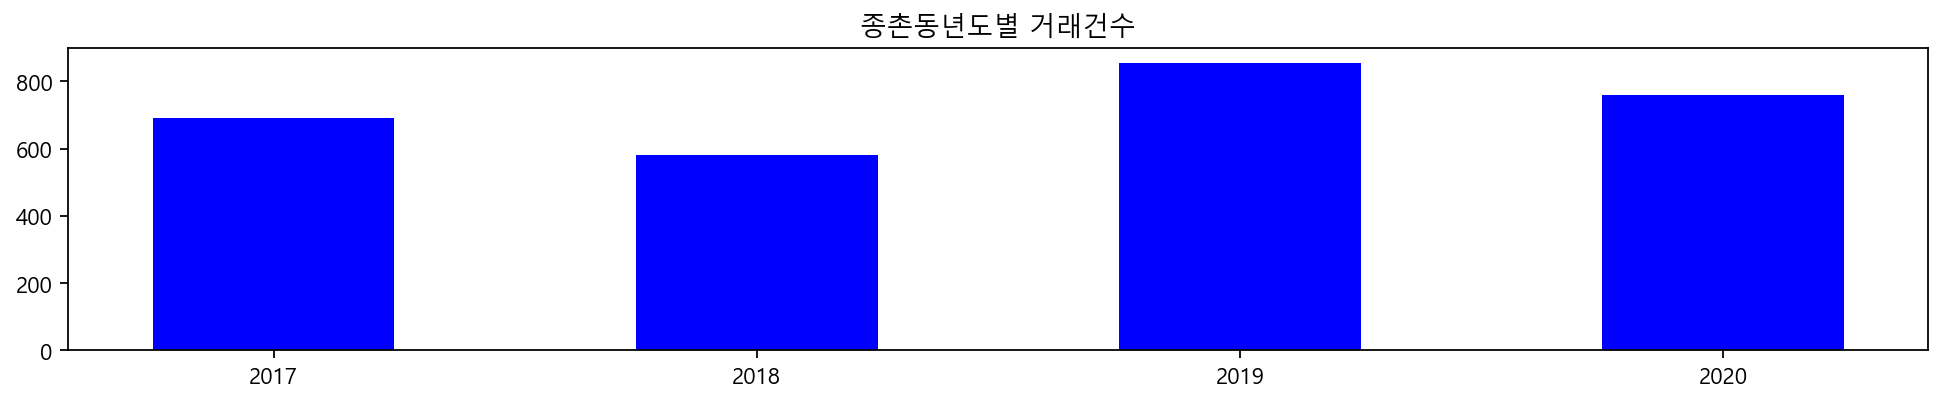

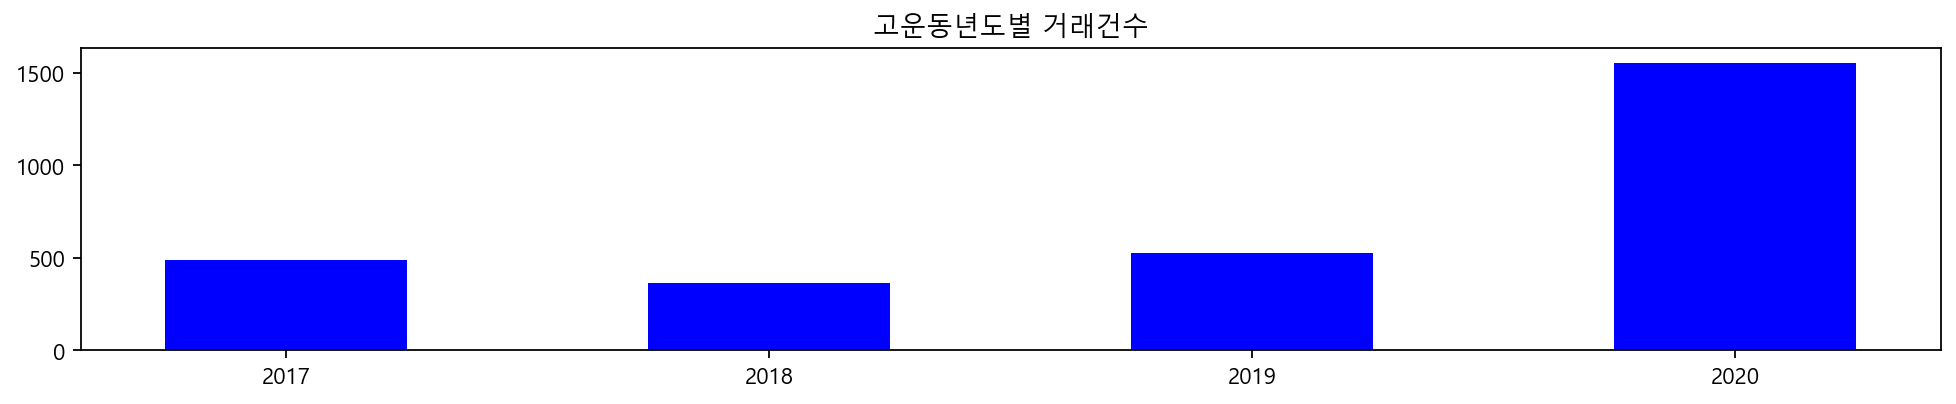

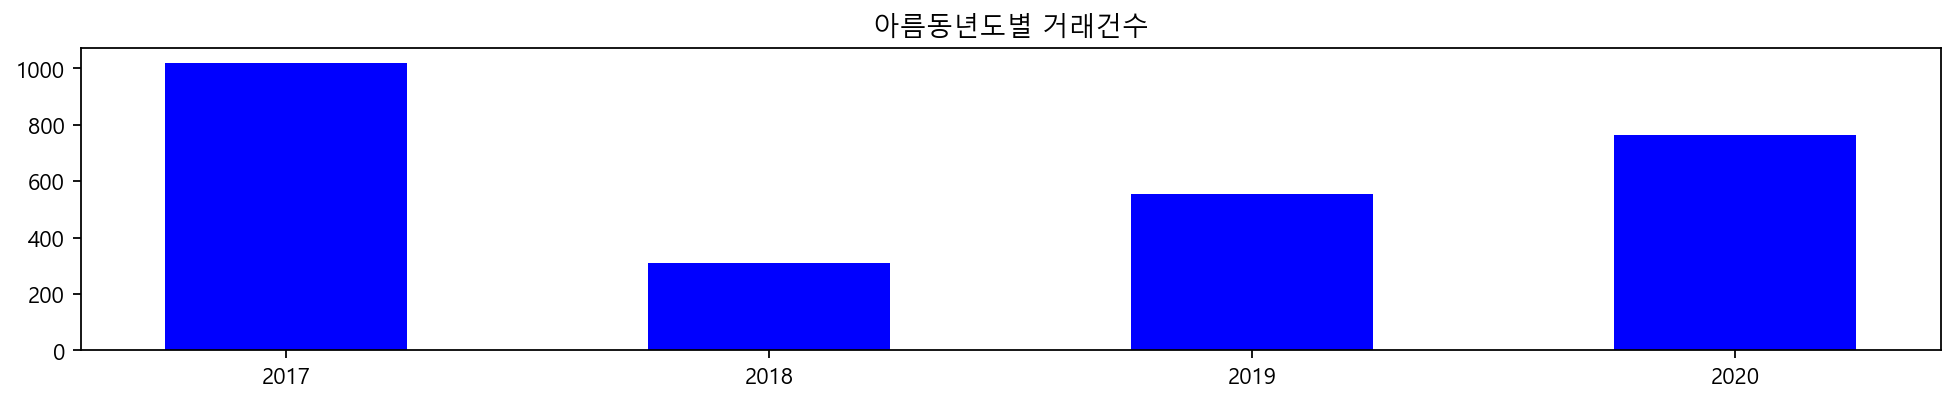

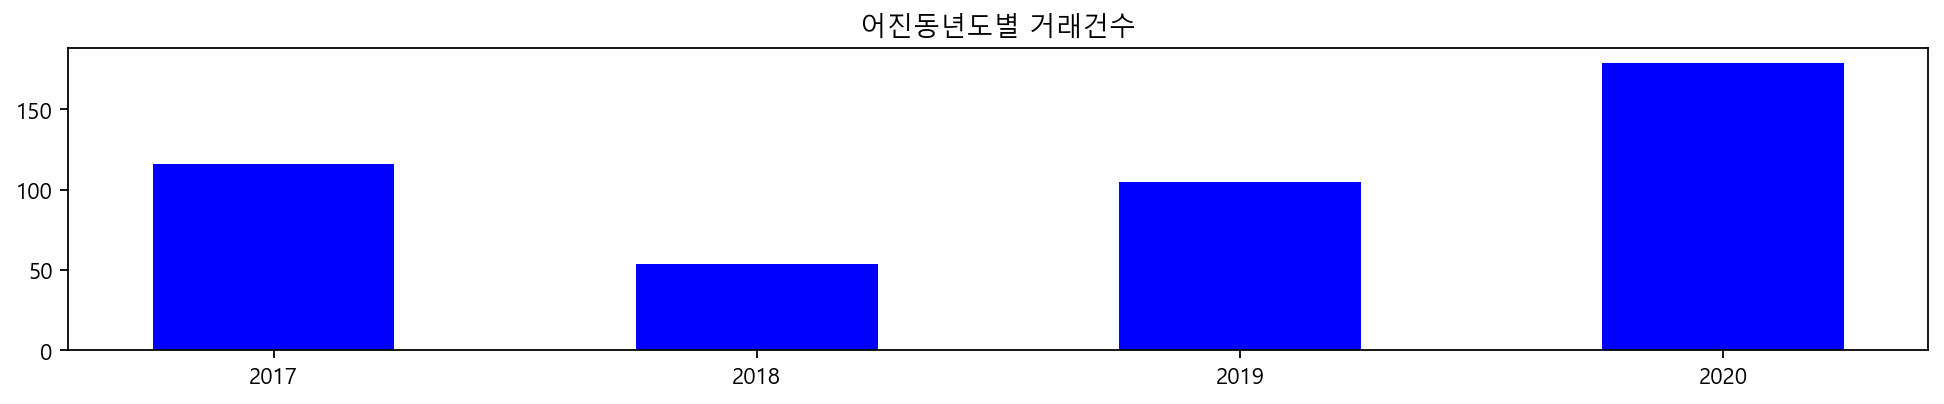

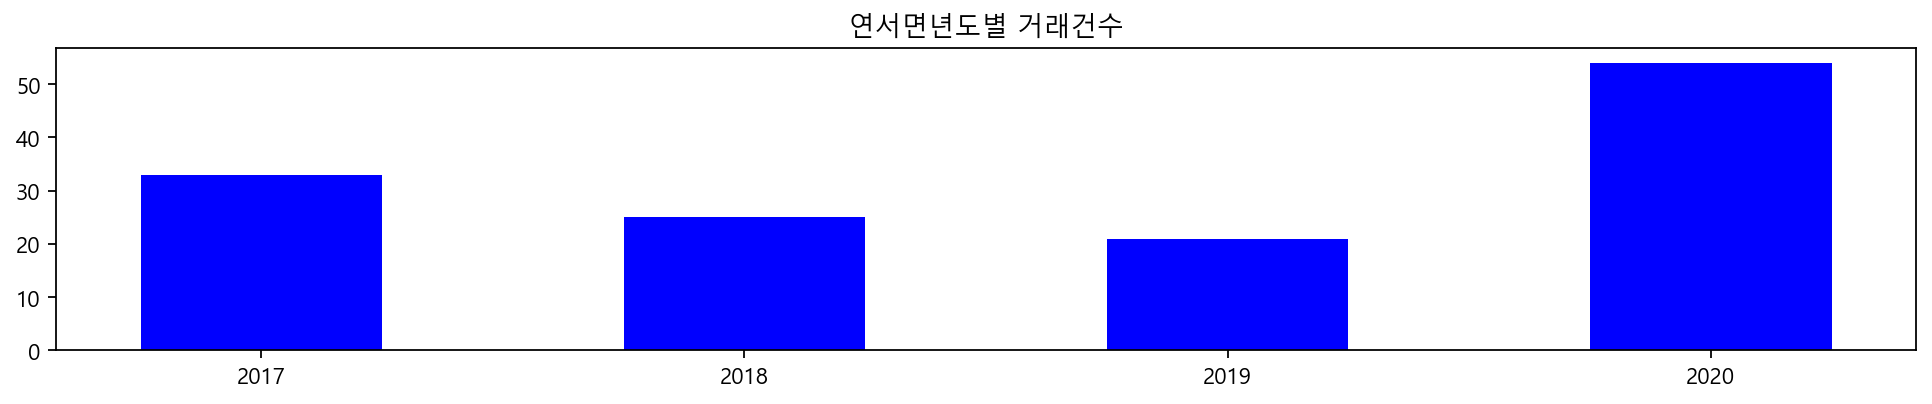

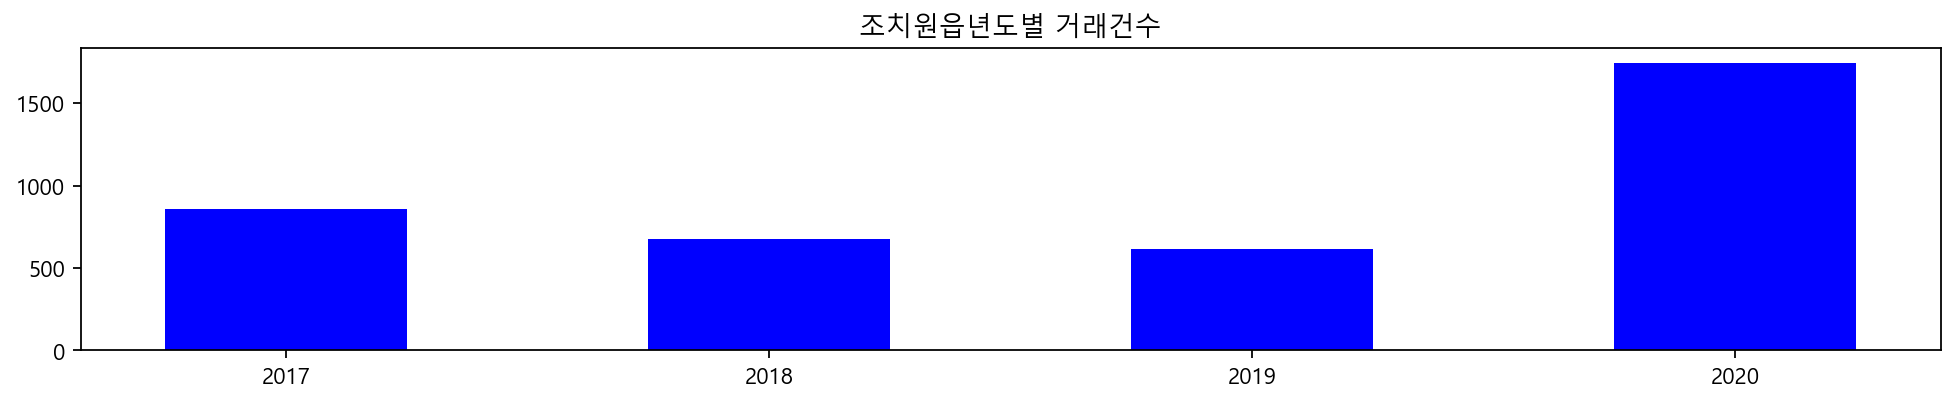

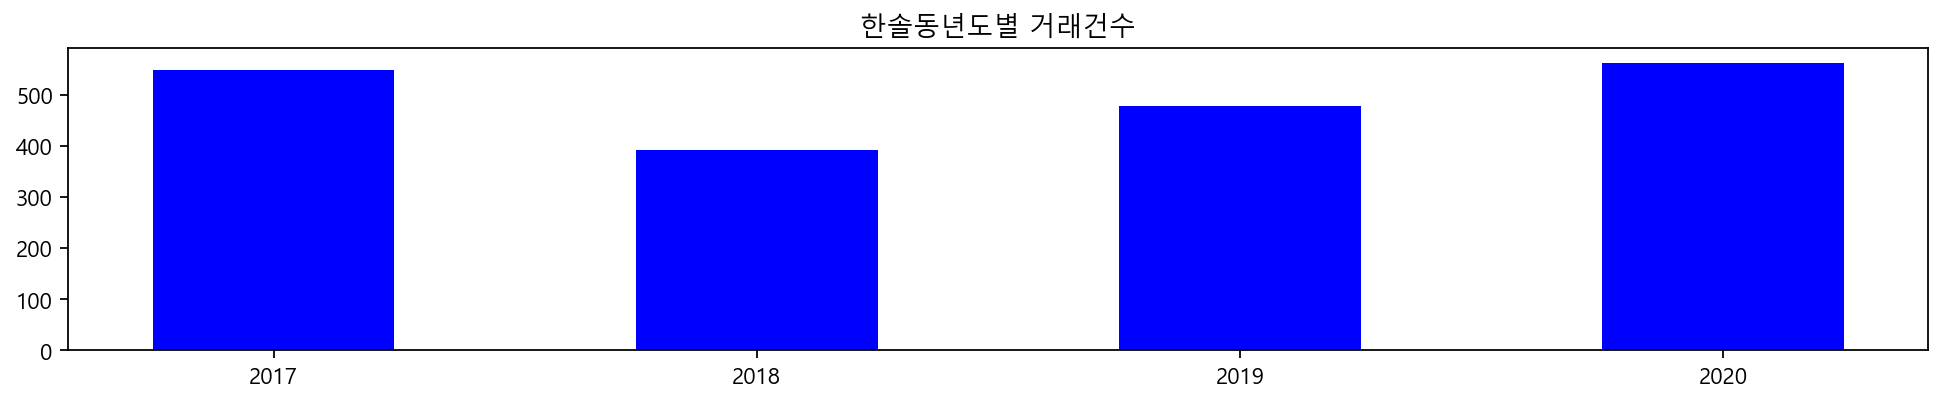

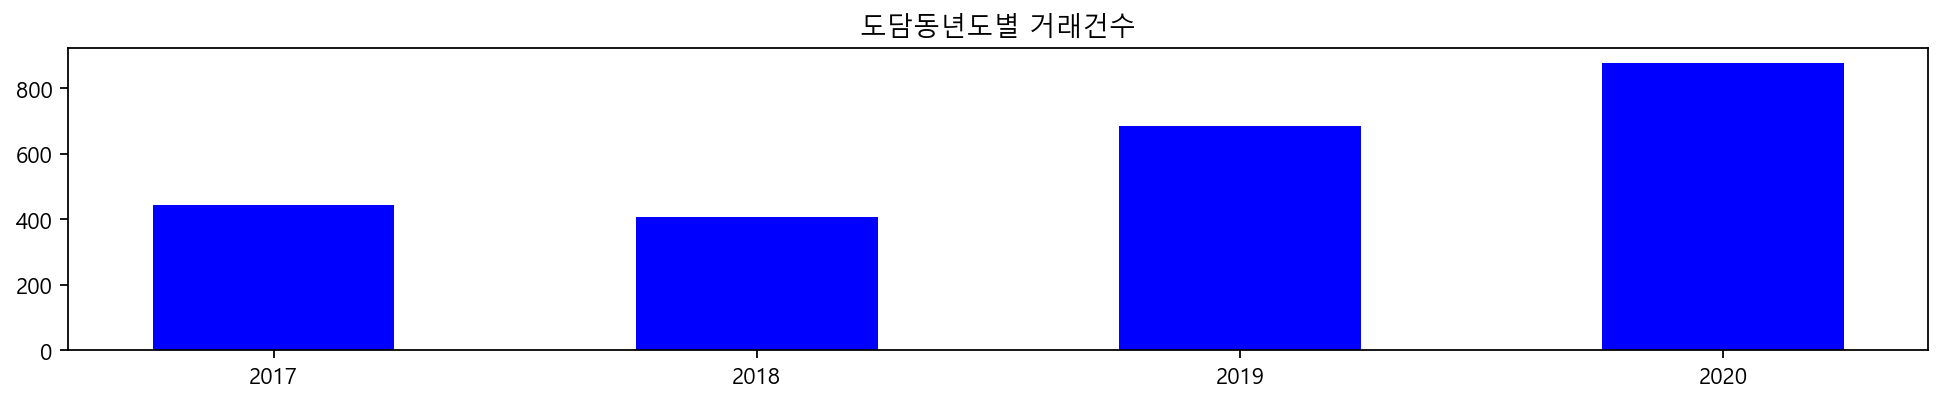

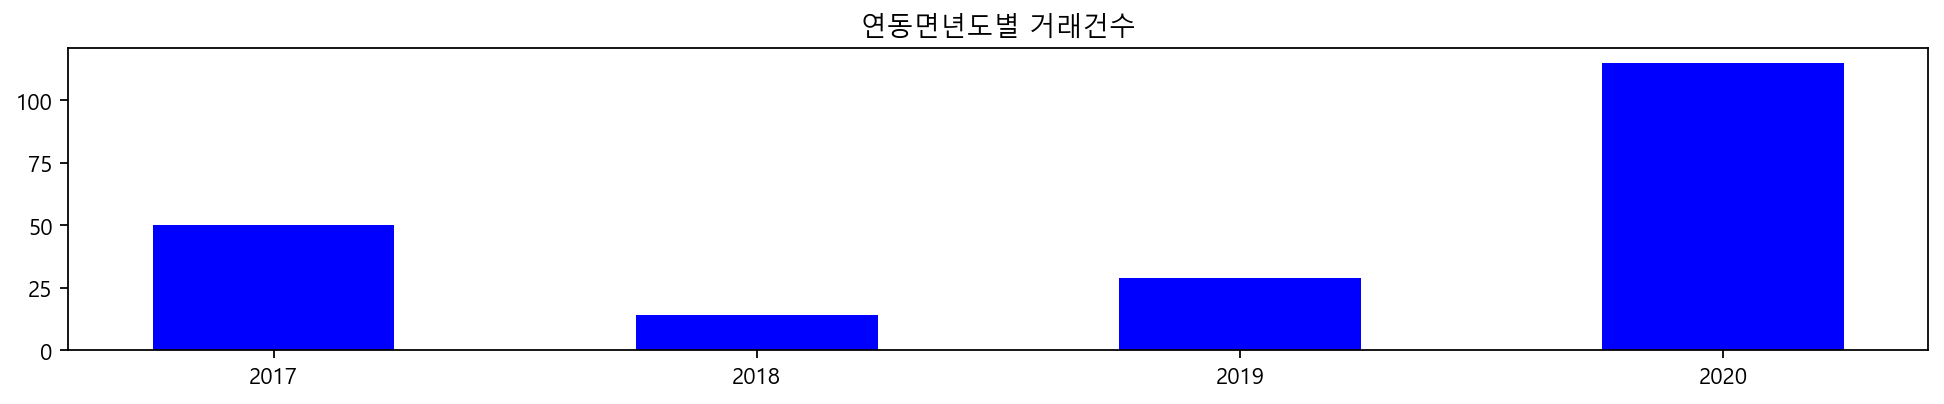

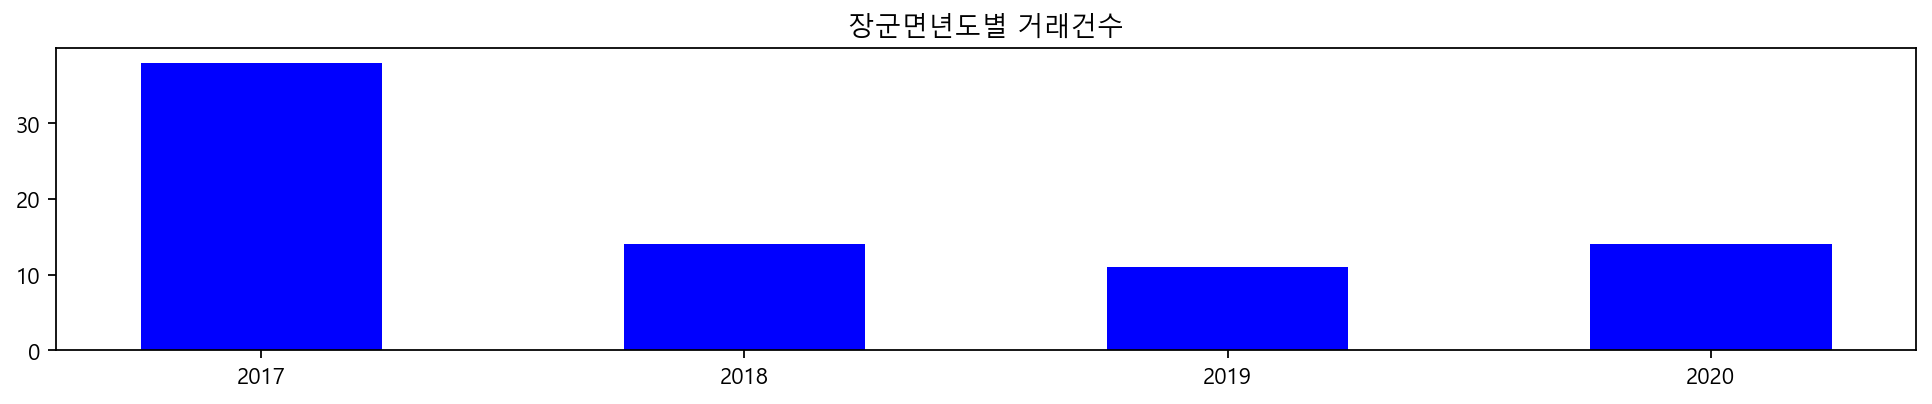

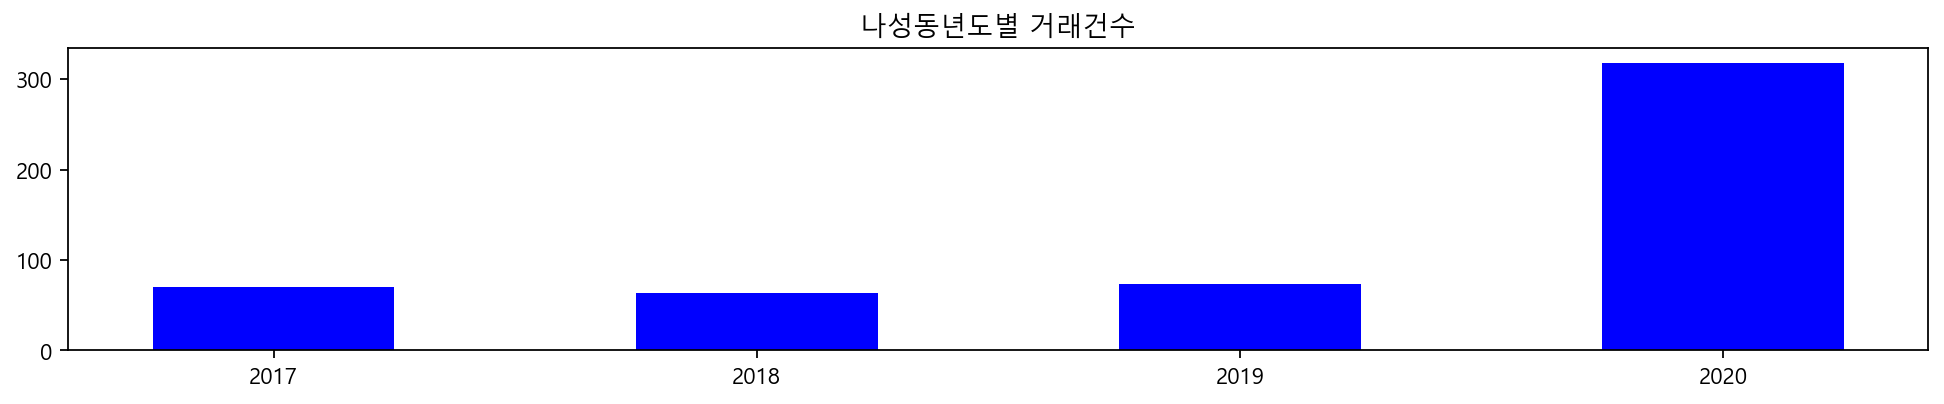

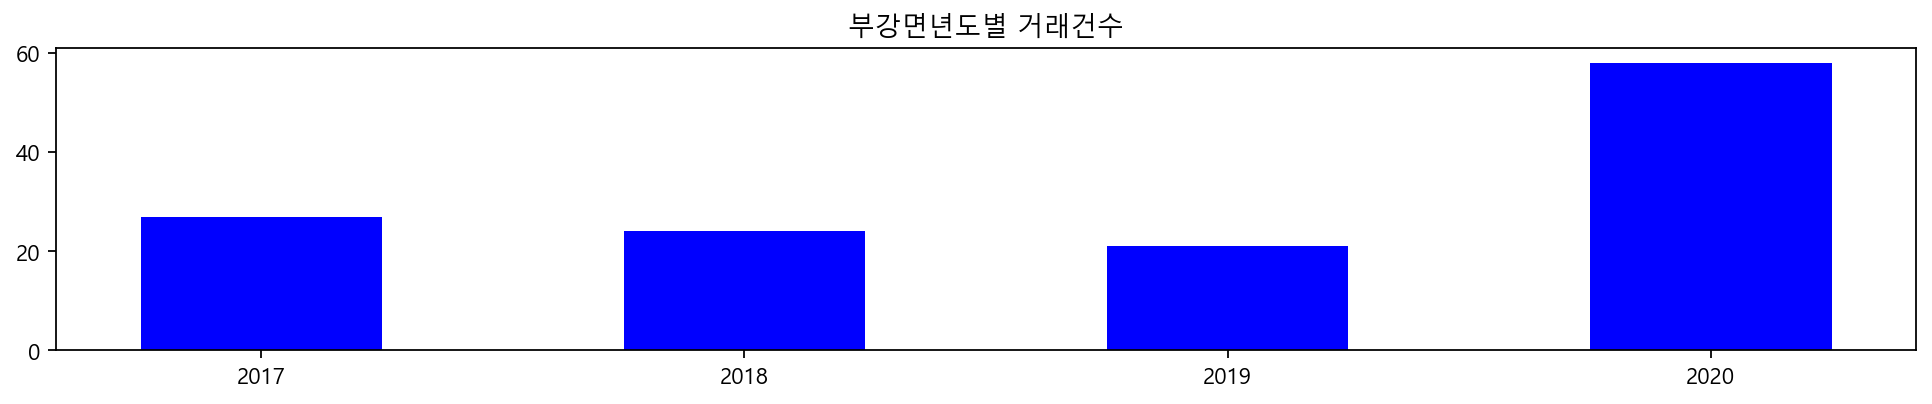

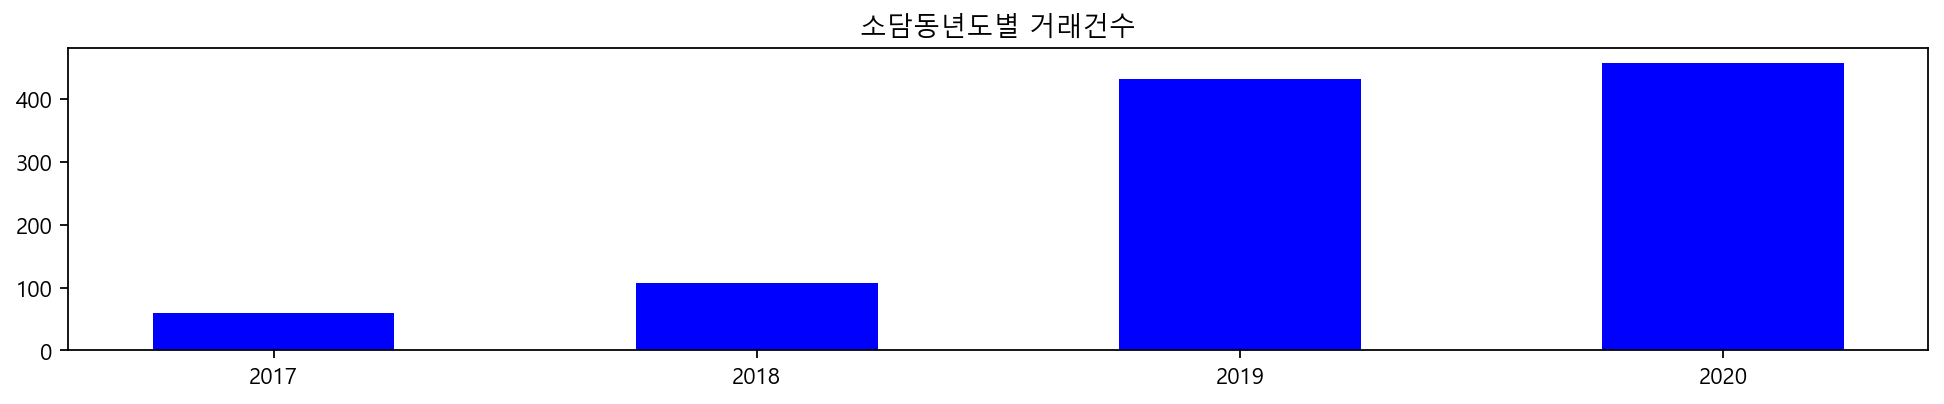

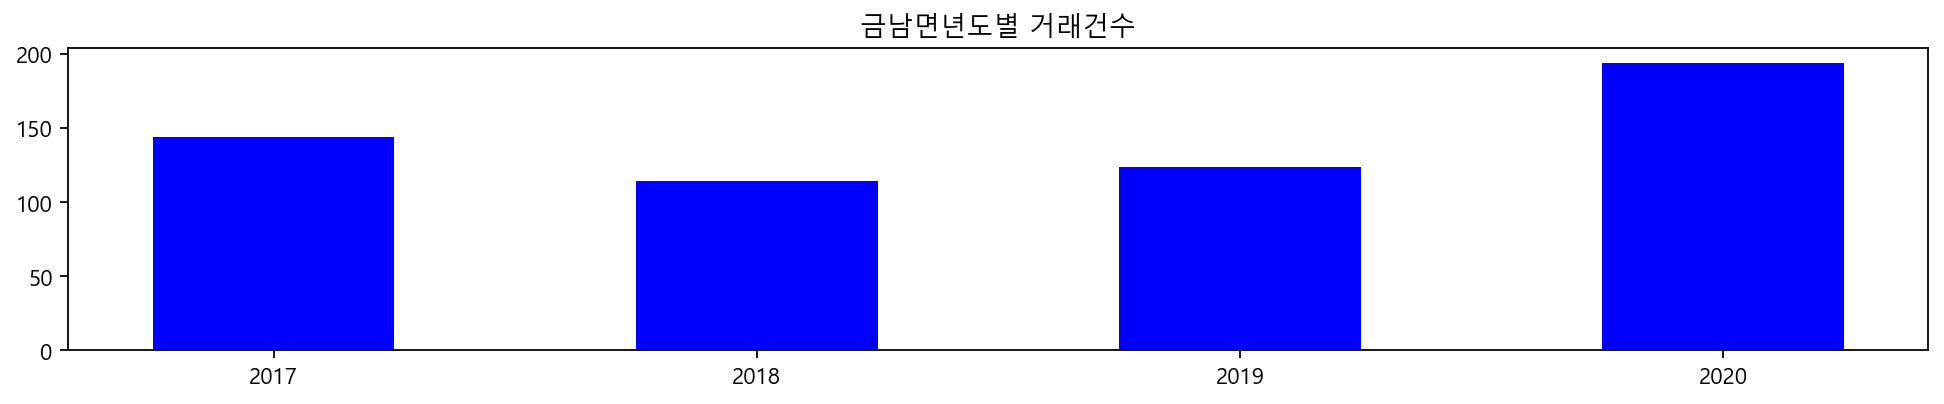

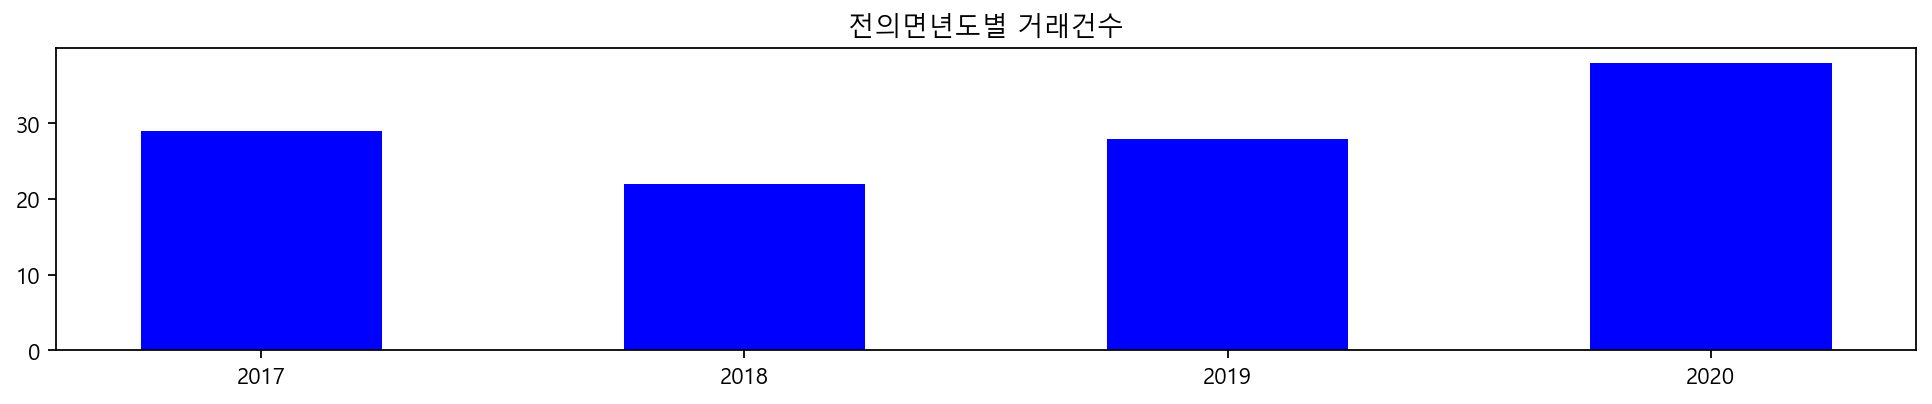

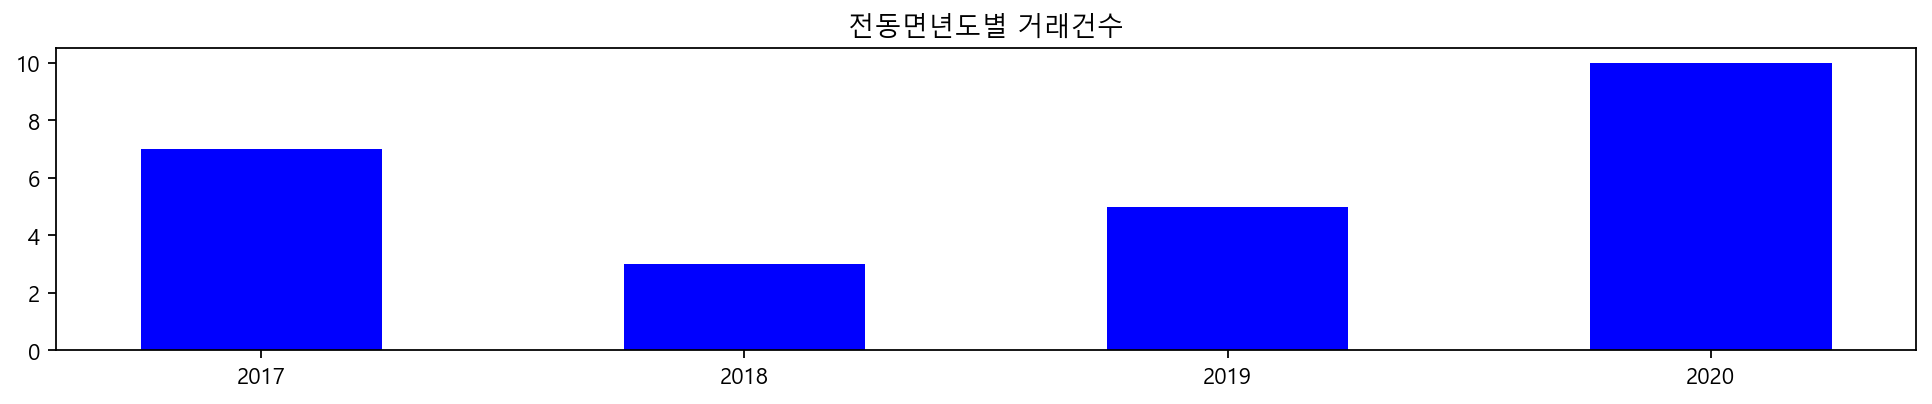

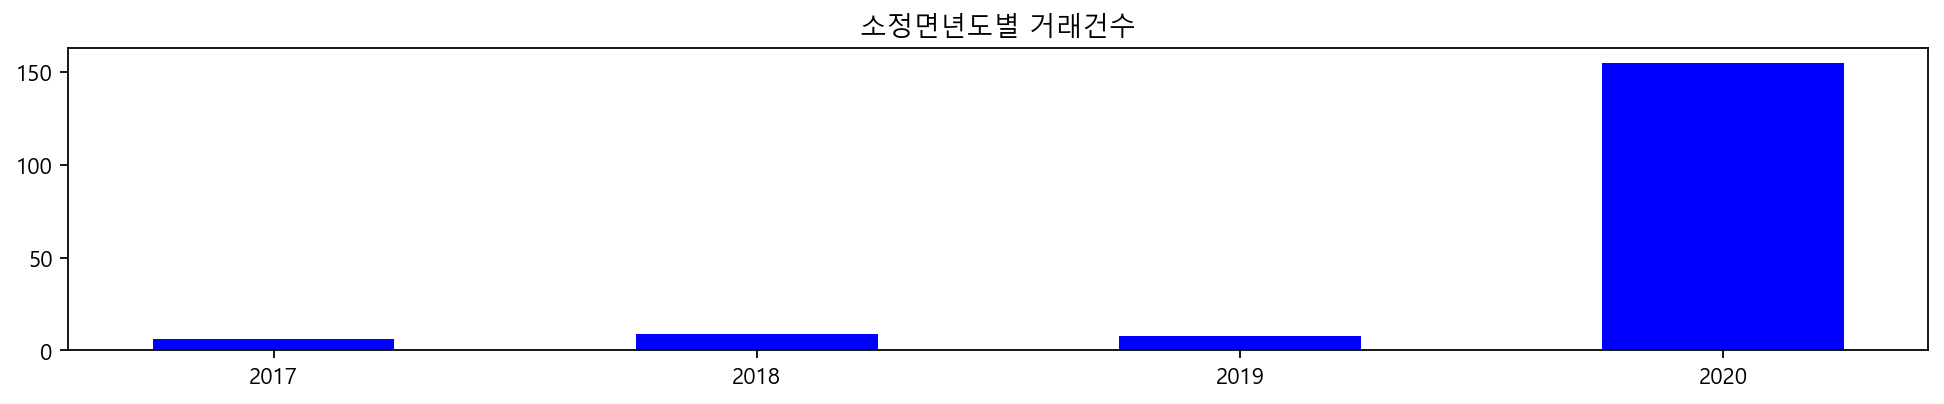

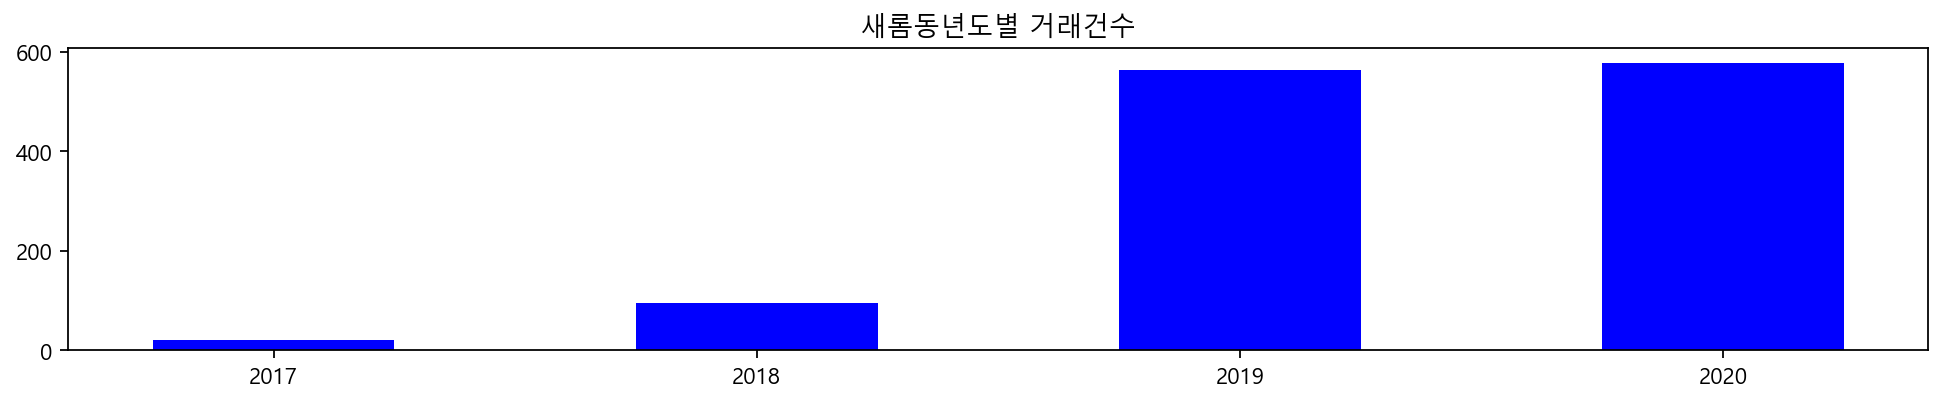

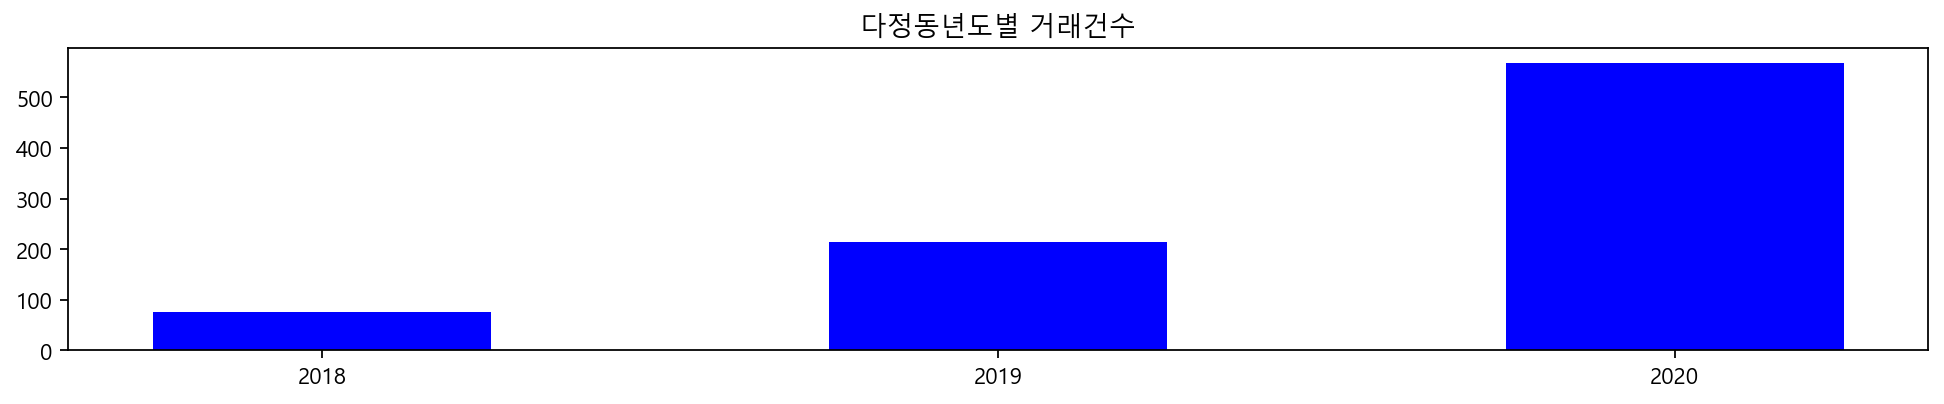

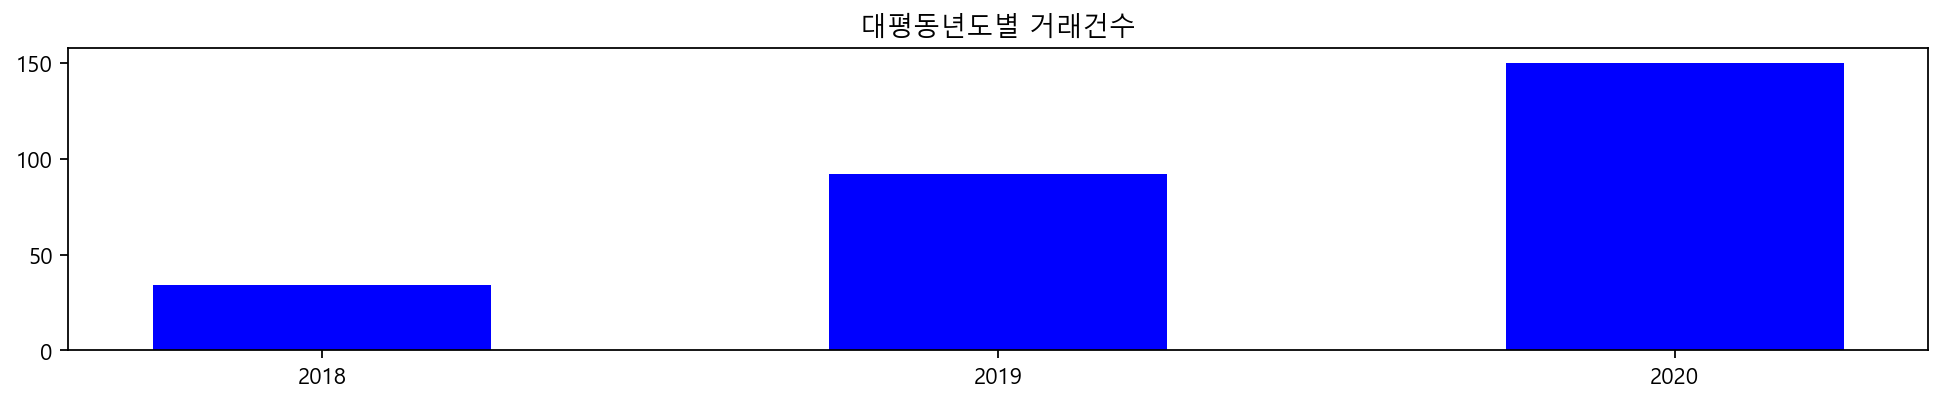

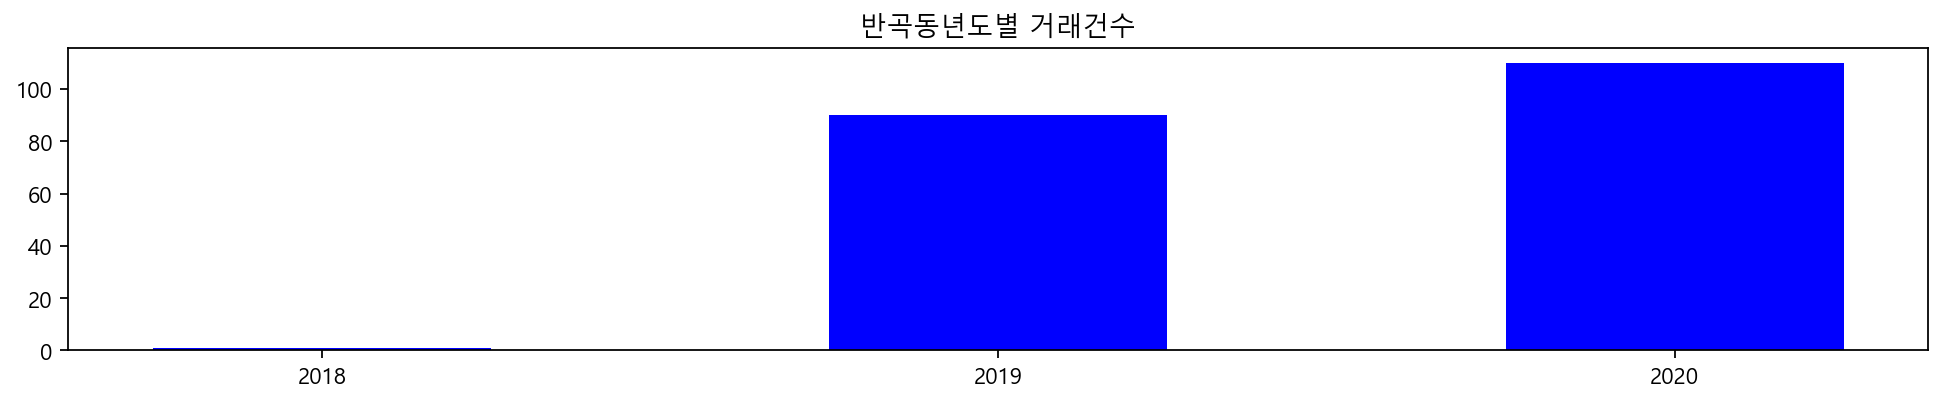

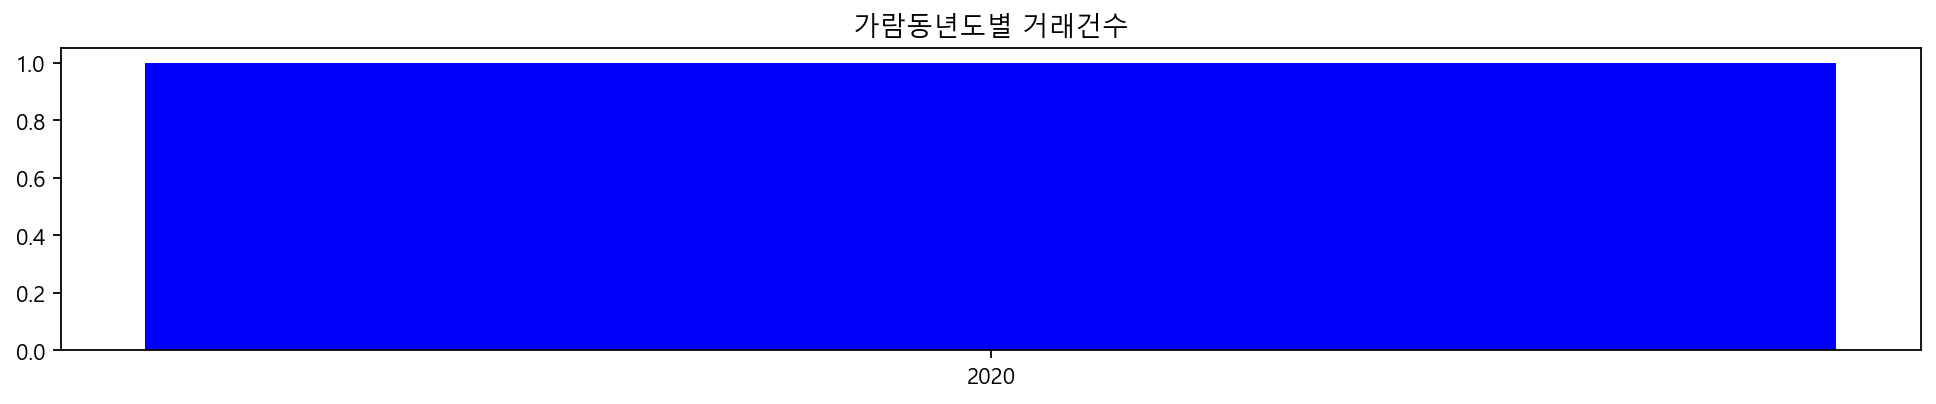

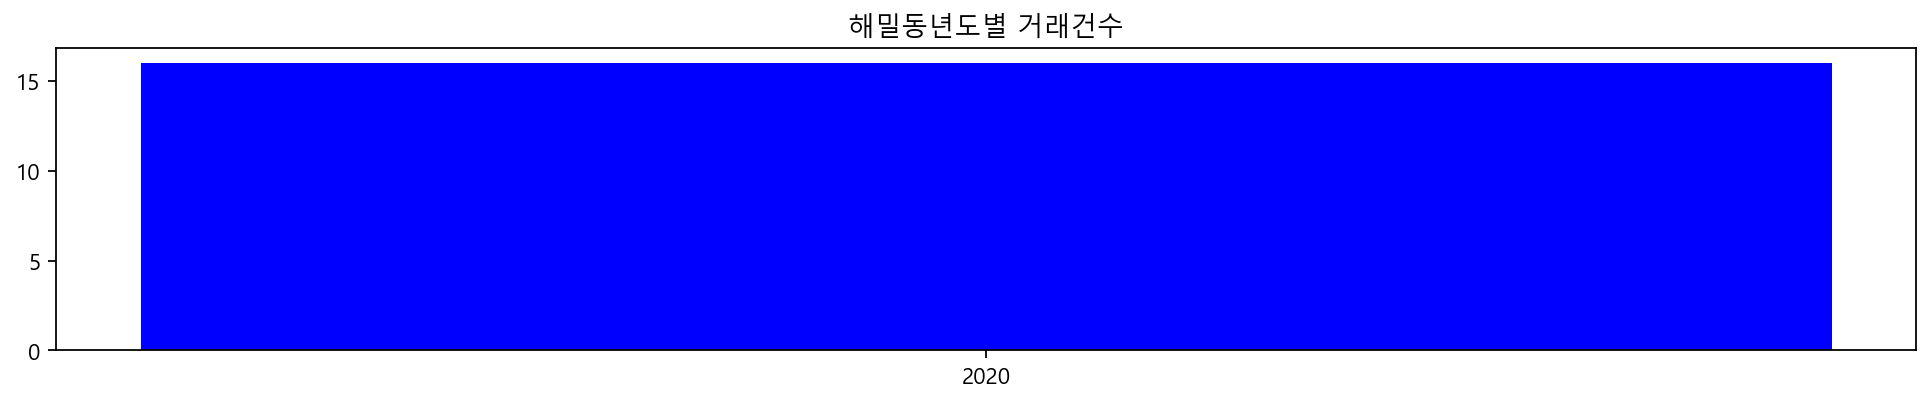

In [9]:
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'년도별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

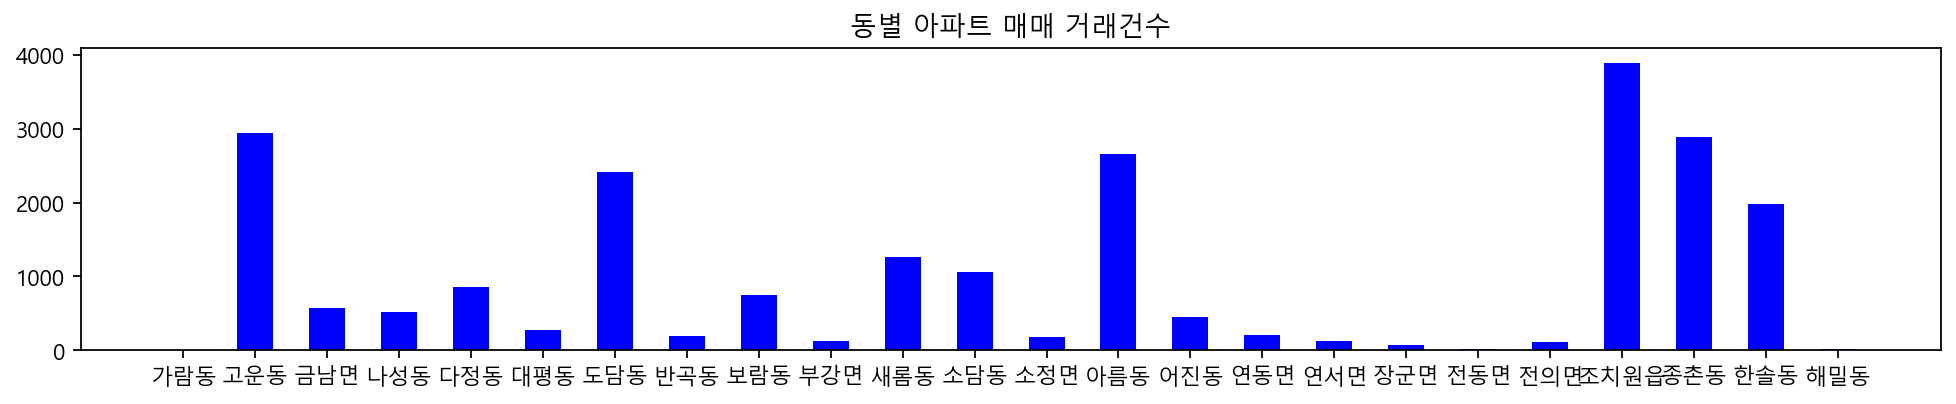

In [10]:
up=data.groupby('읍면동').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [6]:
data['거래금액(만원)'] =data['거래금액(만원)'].apply(riri)

In [ ]:
up=data.groupby('읍면동').mean()
up=up.drop(['가람동','해밀동'])
x=up.index
y=up['거래금액(만원)']
plt.figure(figsize=(11,9),dpi=160)
plt.bar(x,y,width=0.5,color="plum")
plt.xticks(rotation=45,fontsize=15) 
plt.yticks(fontsize=18) 
a='동별 아파트 매매 평균 거래금액(만원)'
plt.title(a,fontsize=18)
plt.savefig(a+'.png')

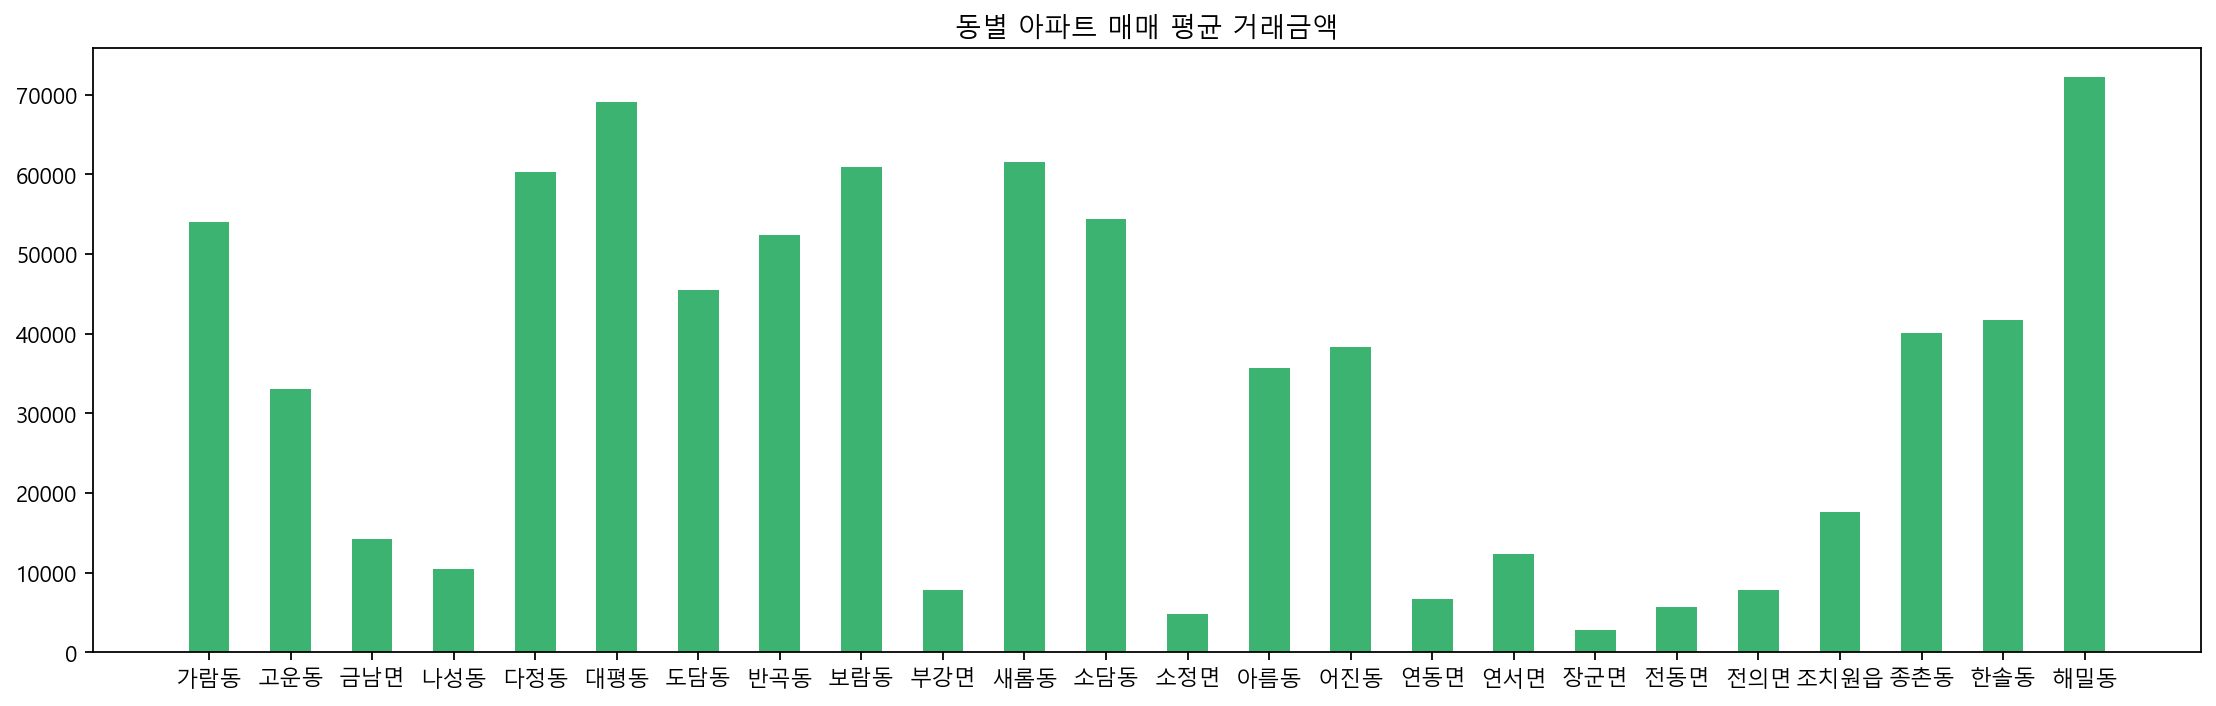

In [10]:
up=data.groupby('읍면동').mean()
x=up.index
y=up['거래금액(만원)']
plt.figure(figsize=(17,5),dpi=160)
plt.bar(x,y,width=0.5,color="mediumseagreen")
a='동별 아파트 매매 평균 거래금액'
plt.title(a)
plt.savefig(a+'.png')

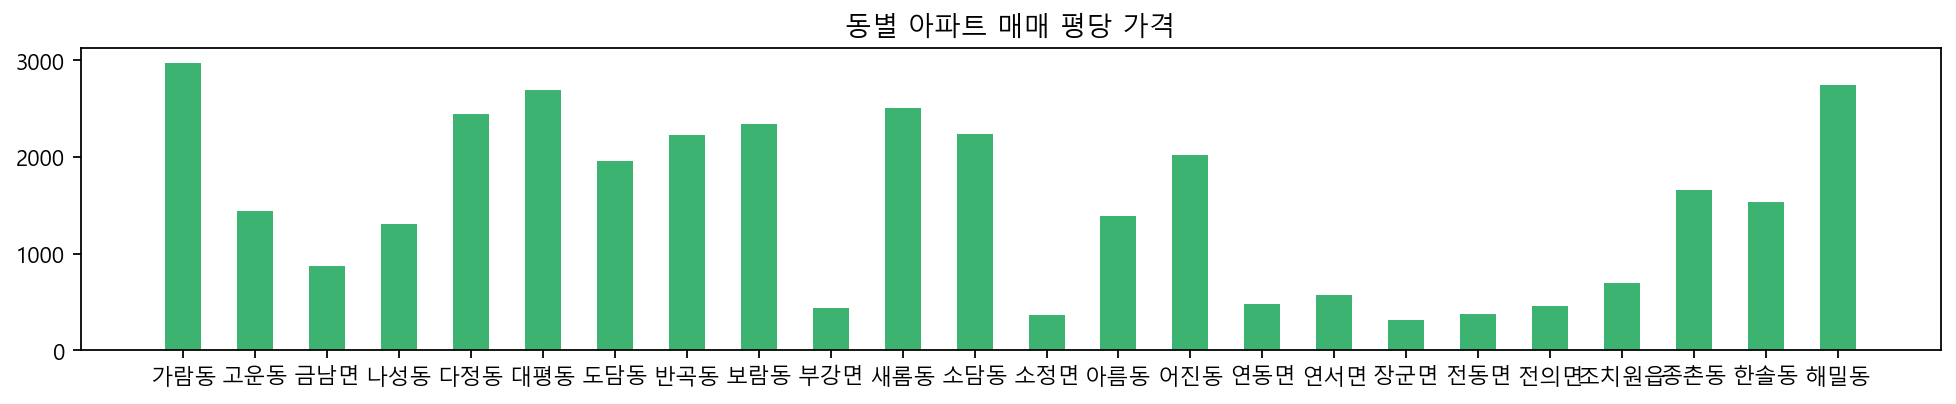

In [11]:
data['평평']=data['전용면적(㎡)']/3.3
data['평당 가격(만원)']=data['거래금액(만원)']/data['평평']
up=data.groupby('읍면동').mean()
x=up.index
y=up['평당 가격(만원)']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="mediumseagreen")
a='동별 아파트 매매 평당 가격'
plt.title(a)
plt.savefig(a+'.png')

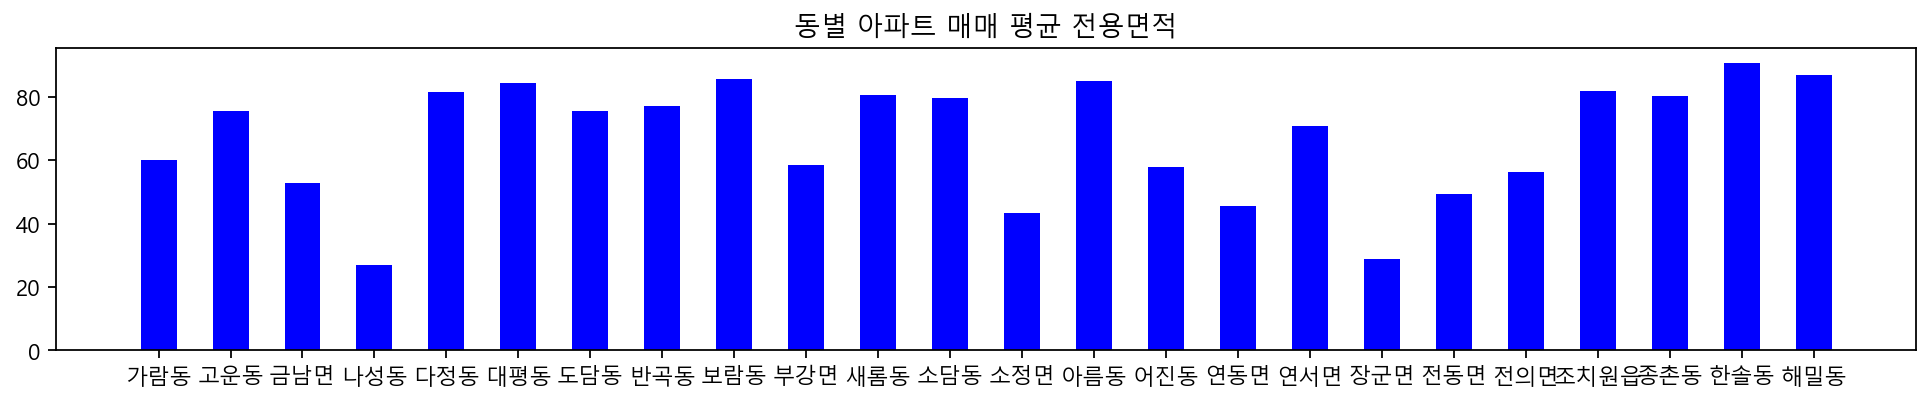

In [15]:
up=data.groupby('읍면동').mean()
x=up.index
y=up['전용면적(㎡)']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 평균 전용면적'
plt.title(a)
plt.savefig(a+'.png')

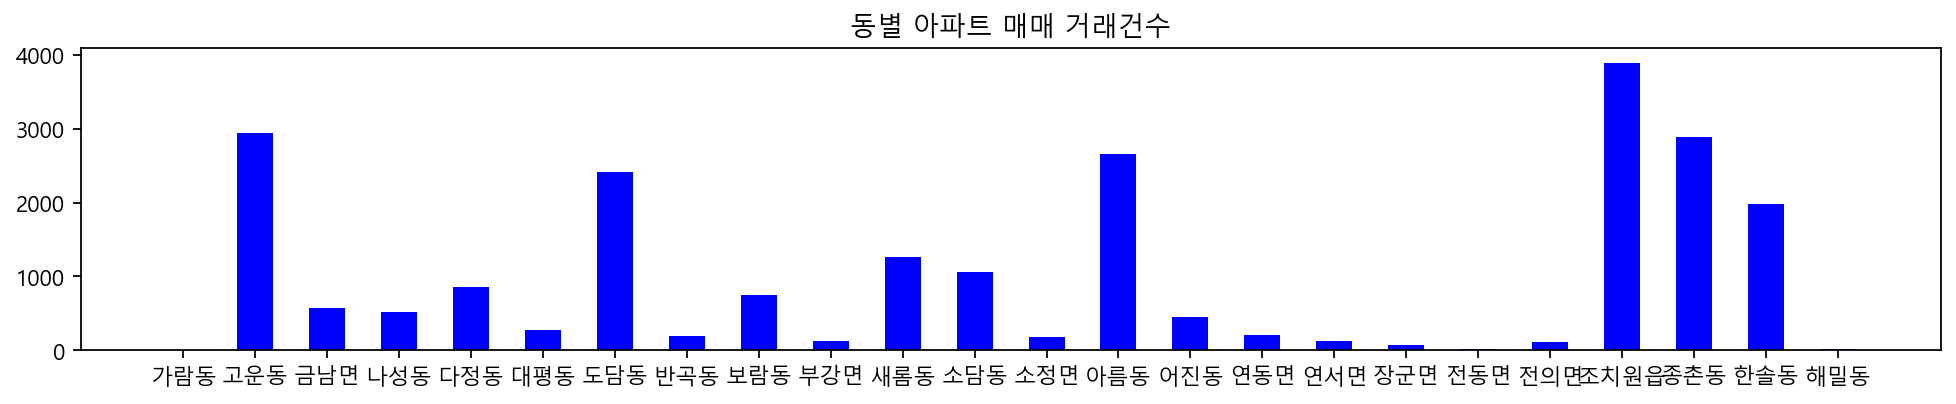

In [16]:
up=data.groupby('읍면동').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data.groupby('읍면동구분').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="#ADD8E6")
a='읍면동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data.groupby('읍면동구분').mean()
x=up.index
y=up['거래금액(만원)']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="#ADD8E6")
a='읍면동별 아파트 매매 평균거래금액'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
data['평평']=data['전용면적(㎡)']/3.3
data['평당 가격(만원)']=data['거래금액(만원)']/data['평평']
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).mean()
    x=group_new.index
    y=group_new['평당 가격(만원)']
    plt.figure(figsize=(15,5),dpi=160)
    plt.bar(x,y,width=0.5,color="mediumvioletred")
    a=dong_one+' 평당 거래 금액(만원)'
    plt.xlabel='년도별'
    plt.ylabel='평당 가격'
    plt.title(a,fontsize=18)
    plt.savefig(a+'.png')

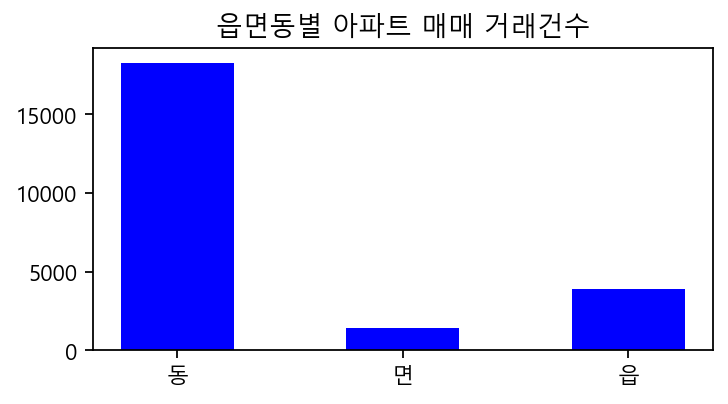

In [18]:
up=data.groupby('읍면동구분').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

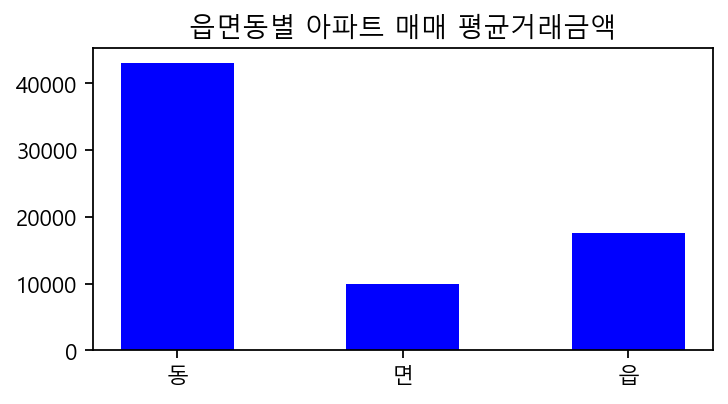

In [19]:
up=data.groupby('읍면동구분').mean()
x=up.index
y=up['거래금액(만원)']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 아파트 매매 평균거래금액'
plt.title(a)
plt.savefig(a+'.png')

### 아파트 전용면적 별 거래 수

In [20]:
sort_data=data.sort_values(by=['계약년월','계약일'])

In [22]:
sort_data['전용면적(㎡)'] =sort_data['전용면적(㎡)'].astype(int)
sort_data_g=sort_data.groupby(by=['전용면적(㎡)'], as_index=False).count()
sort_data_g=sort_data_g.sort_values(by='계약년월',ascending=False)[:10]

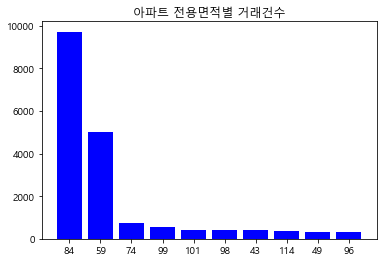

In [23]:
sort_data_g['전용면적(㎡)'] =sort_data_g['전용면적(㎡)'].astype(str)
x=sort_data_g['전용면적(㎡)']
y=sort_data_g['계약년월']
plt.bar(x,y,color="blue")
a='아파트 전용면적별 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 아파트 금액별 거래 수(제일 잘 팔리는 금액대)

In [24]:
sort_data_m=sort_data.groupby(by=['거래금액(만원)'], as_index=False).count()
sort_data_m=sort_data_m.sort_values(by='계약년월',ascending=False)[:10]

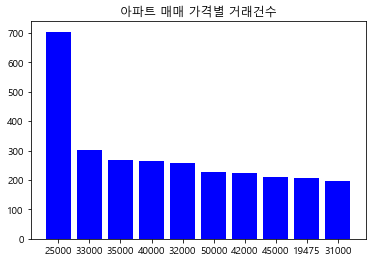

In [25]:
sort_data_m['거래금액(만원)'] =sort_data_m['거래금액(만원)'].astype(str)
x=sort_data_m['거래금액(만원)']
y=sort_data_m['계약년월']
plt.bar(x,y,color="blue")
a='아파트 매매 가격별 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [26]:
#세종시 최고가 아파트 확인
maxpr=np.max(sort_data['거래금액(만원)'])

170000

In [27]:
#세종시 최저가 아파트 확인
minpr=np.min(sort_data['거래금액(만원)'])

1800

In [28]:
#세종시 최고가 아파트 확인
sort_data[sort_data['거래금액(만원)']==maxpr]

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평,계약년,평평,평당 가격(만원)
22169,202011,21,세종특별자치시 반곡동,4102,2,수루배마을3단지,134,170000,27,2019,NaN,동,반곡동,40~50평,2020,40.874667,4159.055324
22468,202012,1,세종특별자치시 한솔동,947,0,첫마을3단지(퍼스트프라임),149,170000,26,2011,NaN,동,한솔동,40~50평,2020,45.366667,3747.244673


In [29]:
#세종시 최저가 아파트 확인
sort_data[sort_data['거래금액(만원)']==minpr]

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평,계약년,평평,평당 가격(만원)
63,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,10평 미만,2017,8.564121,210.179183
64,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,10평 미만,2017,8.564121,210.179183
65,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,10평 미만,2017,8.564121,210.179183
66,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,10평 미만,2017,8.564121,210.179183
67,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,10평 미만,2017,8.564121,210.179183


In [72]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)

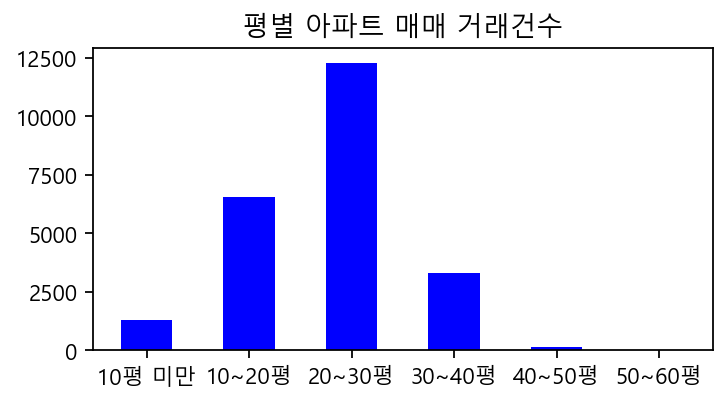

In [32]:
up=data.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

<AxesSubplot:>

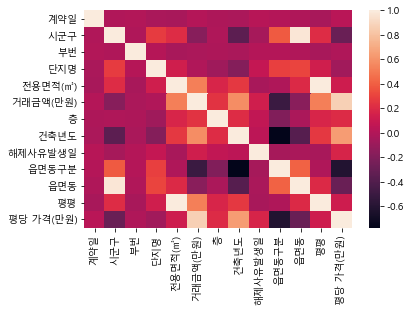

In [33]:
data_to=data
labelencoder_x= LabelEncoder()
y = data_to["시군구"]
data_to["시군구"]=labelencoder_x.fit_transform(y)
y = data_to["단지명"]
data_to["단지명"]=labelencoder_x.fit_transform(y)
y = data_to["읍면동구분"]
data_to["읍면동구분"]=labelencoder_x.fit_transform(y)
y = data_to["읍면동"]
data_to["읍면동"]=labelencoder_x.fit_transform(y)
sns.heatmap(data_to.corr())

### 연립 다주택

In [60]:
yata = pd.read_csv('4.세종시_연립다세대(매매)_실거래가.csv')

In [36]:
yata["평"]=yata["전용면적(㎡)"].apply(pyeong)
yata['읍면동구분']=yata['시군구'].apply(sort_dong)
yata['읍면동']=yata['시군구'].apply(sort_dong2)

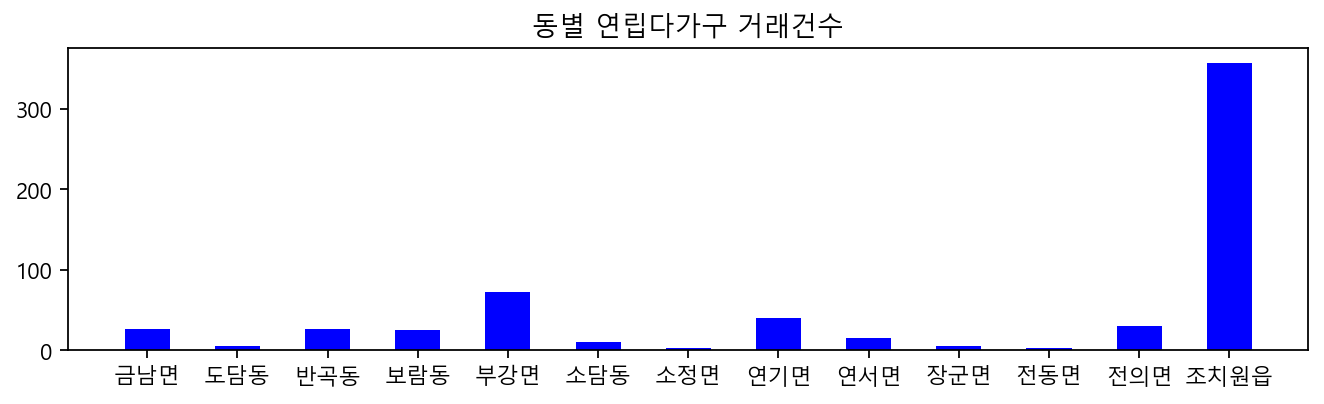

In [37]:
up=yata.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(10,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

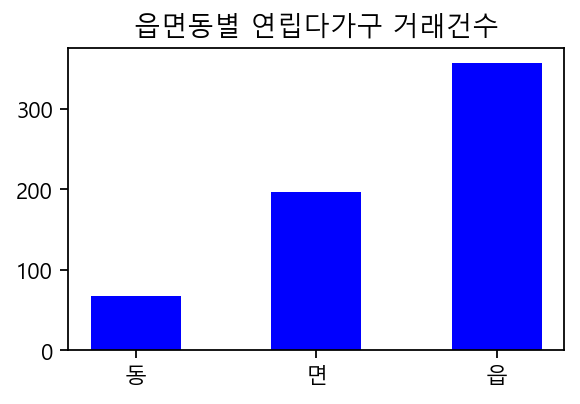

In [38]:
up=yata.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(4,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

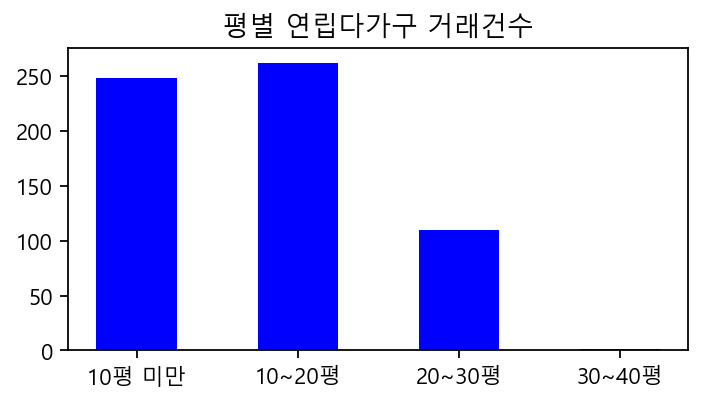

In [39]:
up=yata.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 단독다가구 - 전용면적 없음

In [61]:
danta = pd.read_csv('5.세종시_단독다가구(매매)_실거래가.csv')

In [70]:
danta["평"]=danta["연면적(㎡)"].apply(pyeong)

In [41]:
danta['읍면동구분']=danta['시군구'].apply(sort_dong)
danta['읍면동']=danta['시군구'].apply(sort_dong2)

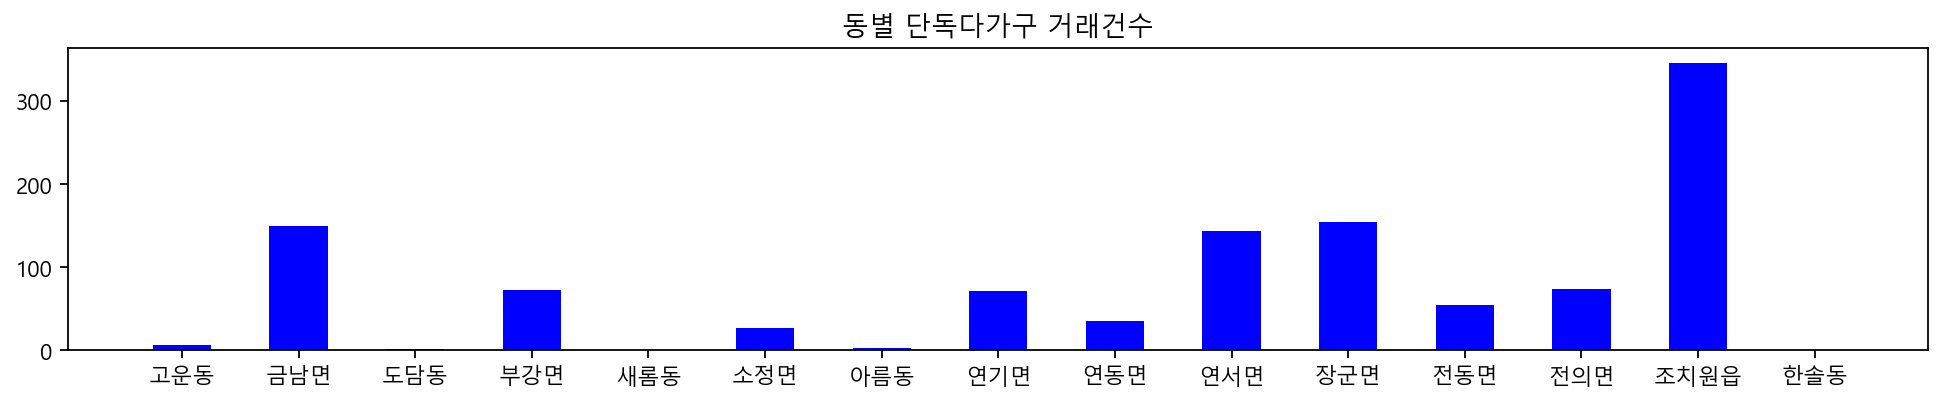

In [42]:
up=danta.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 단독다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

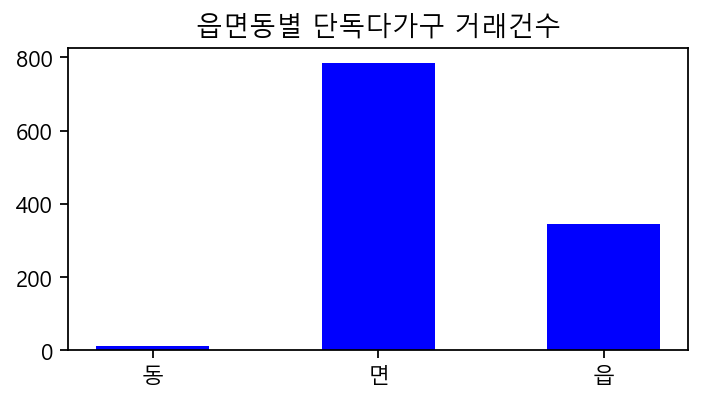

In [43]:
up=danta.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 단독다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

<BarContainer object of 6 artists>

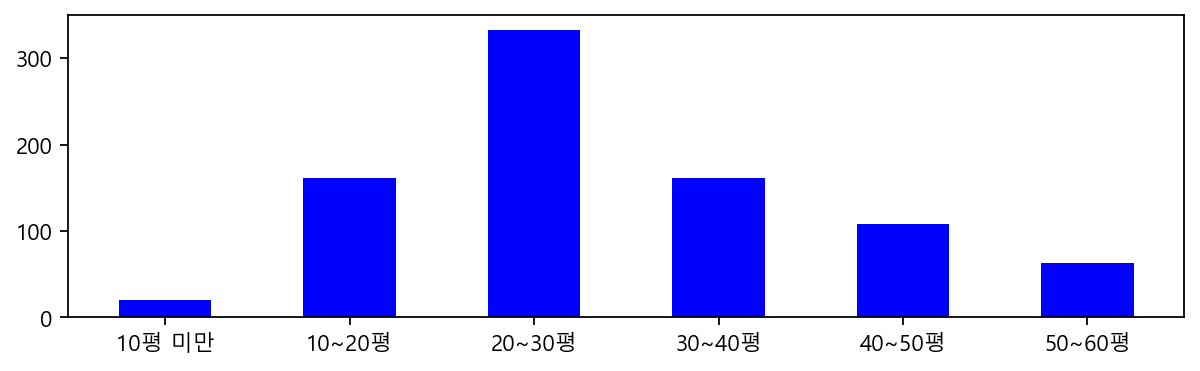

In [44]:
up=danta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(9,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")

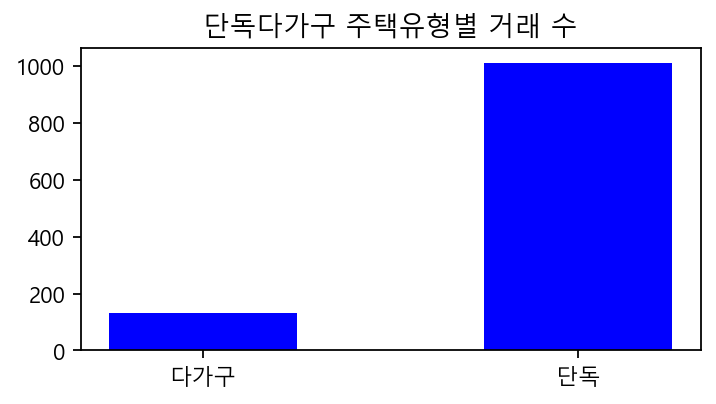

In [45]:
up=danta.groupby('주택유형').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 주택유형별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

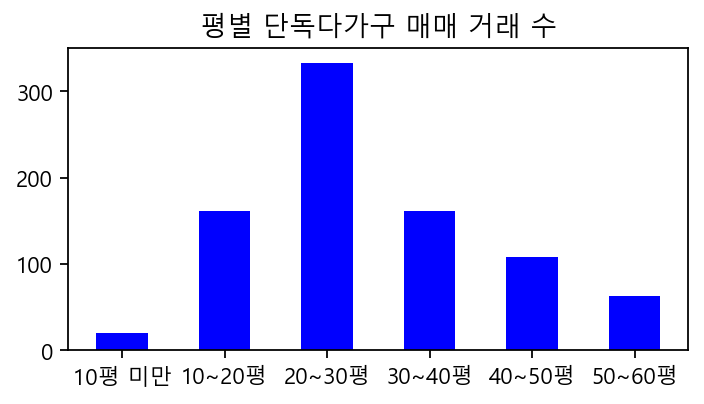

In [46]:
up =danta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 단독다가구 매매 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 오피스텔

In [62]:
oata = pd.read_csv('6.세종시_오피스텔(매매)_실거래가.csv')

In [69]:
oata["평"]=oata["전용면적(㎡)"].apply(pyeong)

In [48]:
oata['읍면동구분']=oata['시군구'].apply(sort_dong)
oata['읍면동']=oata['시군구'].apply(sort_dong2)

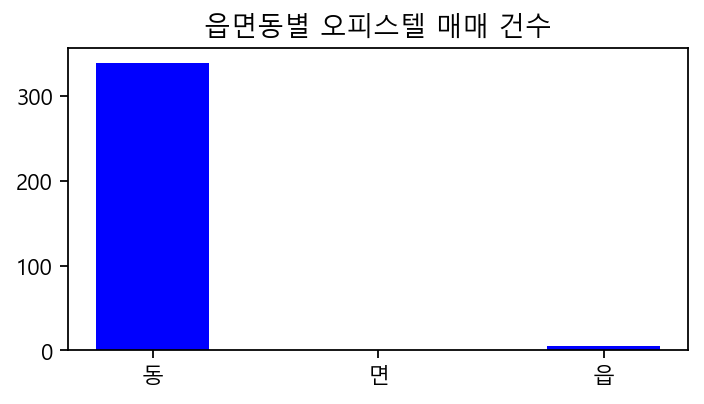

In [49]:
up=oata.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 오피스텔 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

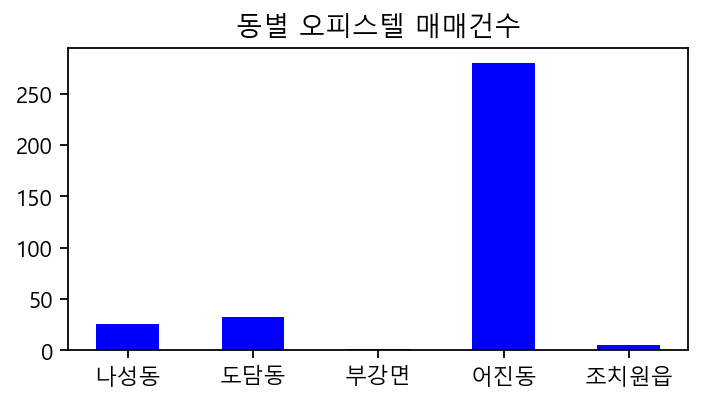

In [50]:
up=oata.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 오피스텔 매매건수'
plt.title(a)
plt.savefig(a+'.png')

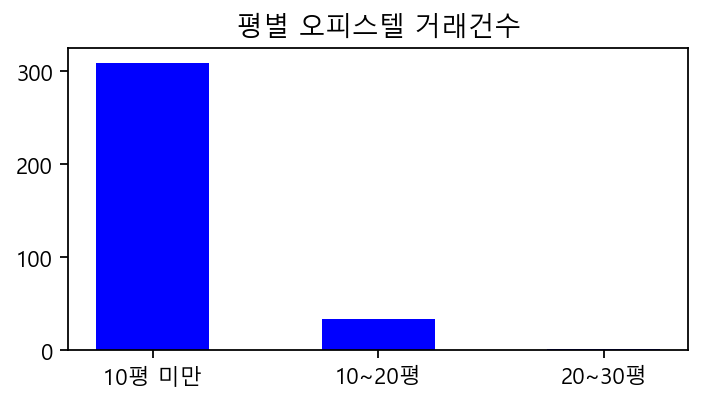

In [51]:
up=oata.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 오피스텔 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 매매 총 합

In [73]:
data_all = pd.concat([data,yata,danta,oata], ignore_index=True)

In [74]:
data_all['읍면동구분']=data_all['시군구'].apply(sort_dong)
data_all['읍면동']=data_all['시군구'].apply(sort_dong2)

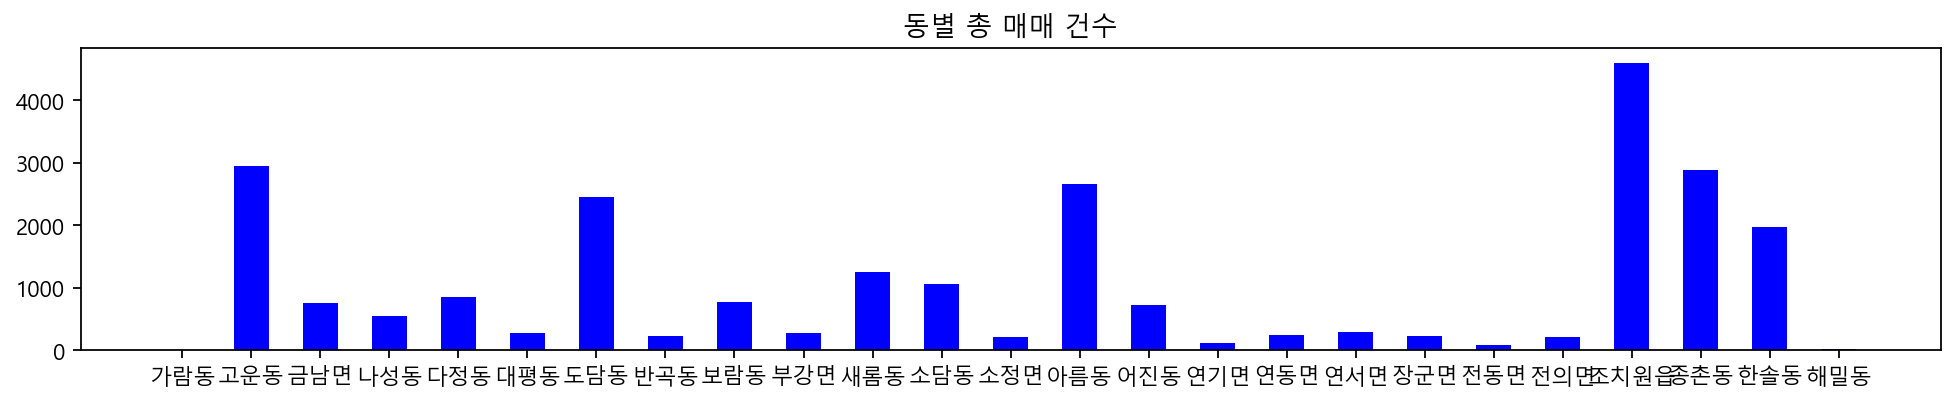

In [75]:
up=data_all.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 총 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

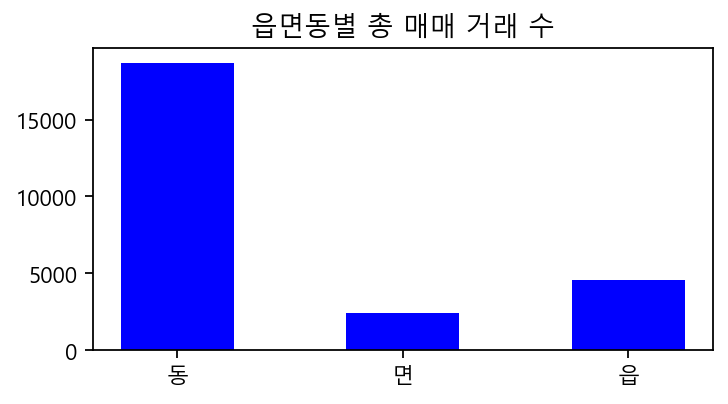

In [76]:
up=data_all.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 총 매매 거래 수'
plt.title(a)
plt.savefig(a+'.png')

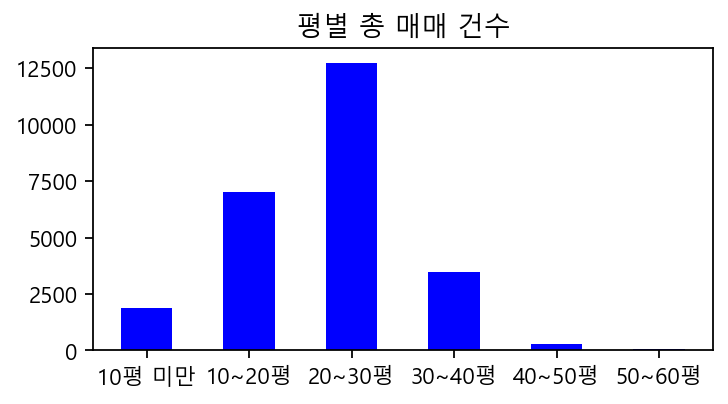

In [77]:
up=data_all.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 총 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

## 매매로 세종시로 오는 이사건 수

In [78]:
data_all['계약년월'] =data_all['계약년월'].astype(str)

(0.0, 5.0, 0.0, 1700.0)

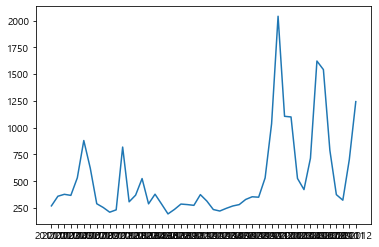

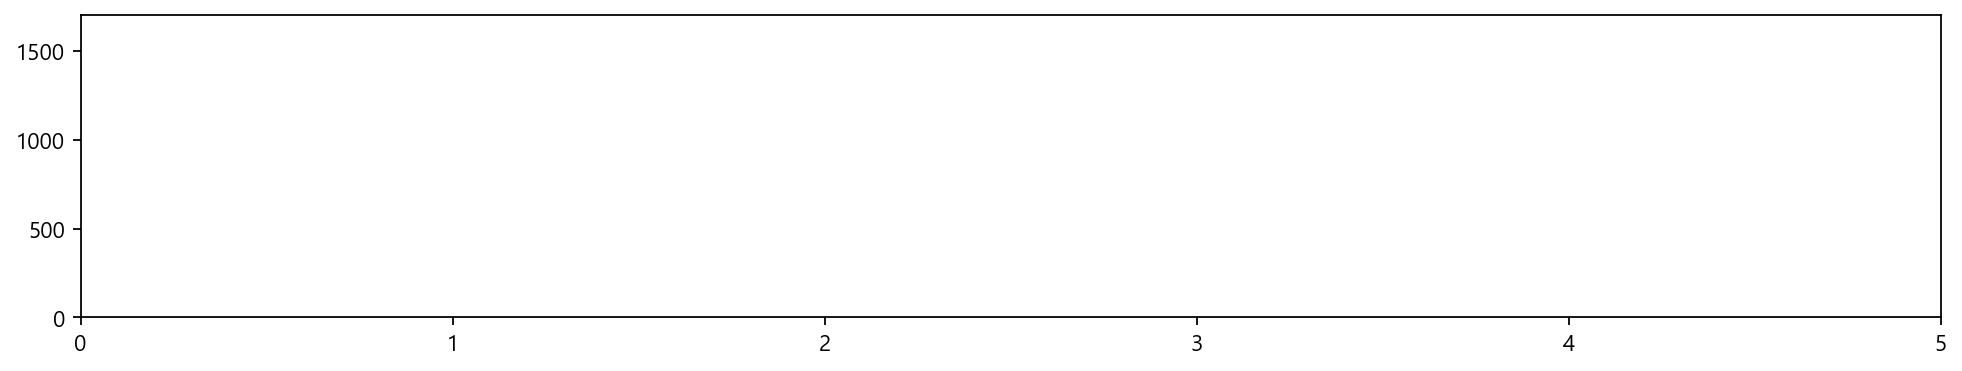

In [79]:
###아파트 계약일
plt.figure(figsize=(15,2.5),dpi=160)
tt1=data_all.groupby('계약년월').count()
plt.plot(tt1.index,tt1['계약일'])

### 달별 매매 이사건수(2020년 11월 12월 데이터 없음) 

In [80]:
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)

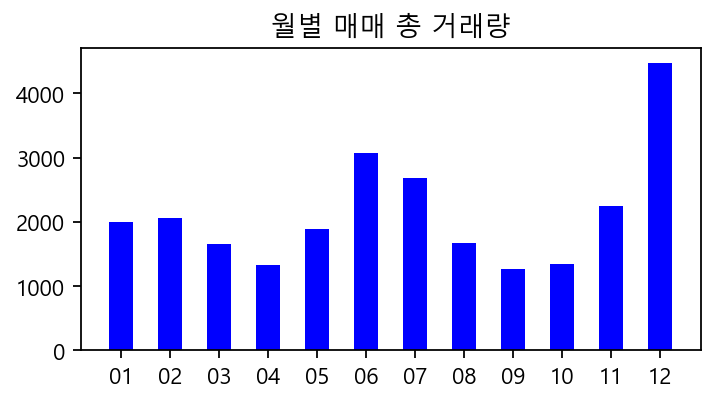

In [81]:
data_all['계약년월']=data_all['계약년월'].astype(str)
data_all['계약월']=data_all['계약년월'].apply(mon)
tt2=data_all.groupby('계약월').count()
x=tt2.index
y=tt2['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='월별 매매 총 거래량'
plt.title(a)
plt.savefig(a+'.png')

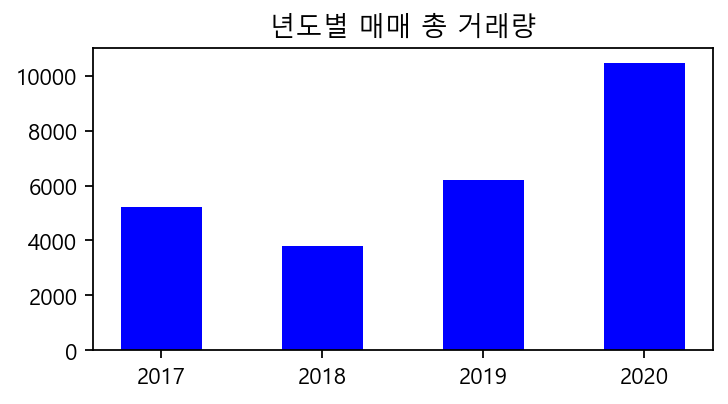

In [82]:
data_all['계약년']=data_all['계약년월'].apply(year)
tt2_1=data_all.groupby('계약년').count()
x=tt2_1.index
y=tt2_1['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='년도별 매매 총 거래량'
plt.title(a)
plt.savefig(a+'.png')

### 아파트 전월세

In [138]:
data_jeon = pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv')
data_jeon["평"]=data_jeon["전용면적(㎡)"].apply(pyeong)

In [140]:
data_jeon = pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv')

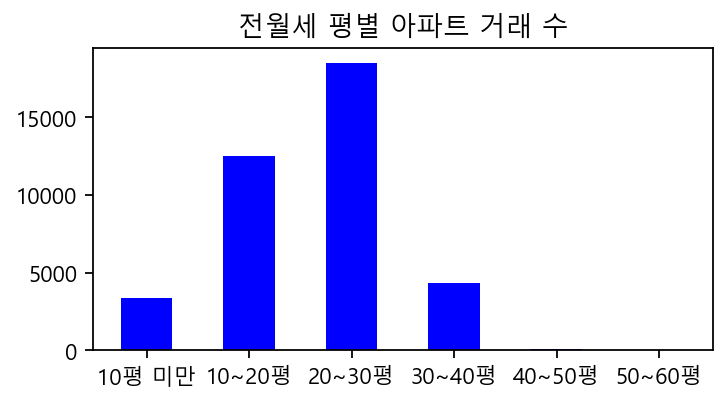

In [84]:
up=data_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전월세 평별 아파트 거래 수'
plt.title(a)
plt.savefig(a+'.png')

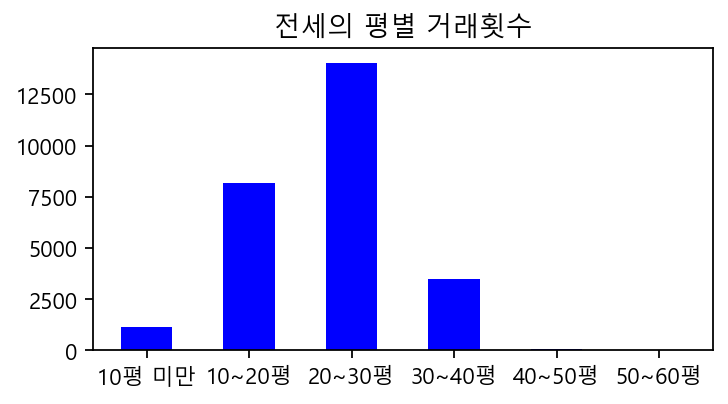

In [85]:
data_jeon2=data_jeon[data_jeon['전월세구분']=='전세']
up=data_jeon2.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전세의 평별 거래횟수'
plt.title(a)
plt.savefig(a+'.png')

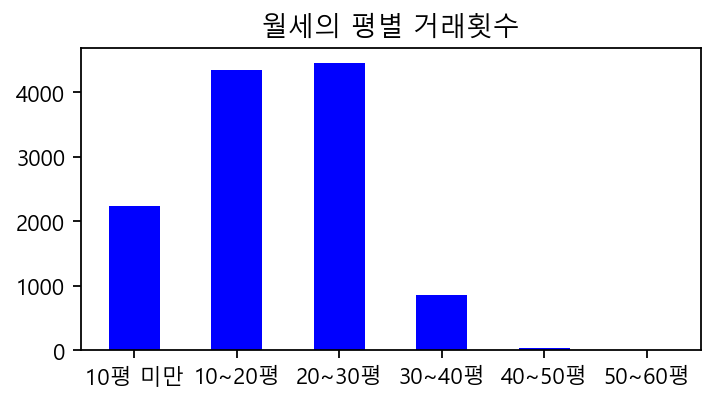

In [86]:
data_jeon2=data_jeon[data_jeon['전월세구분']=='월세']
up=data_jeon2.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='월세의 평별 거래횟수'
plt.title(a)
plt.savefig(a+'.png')

In [94]:
apart = pd.concat([data,data_jeon], ignore_index=True)

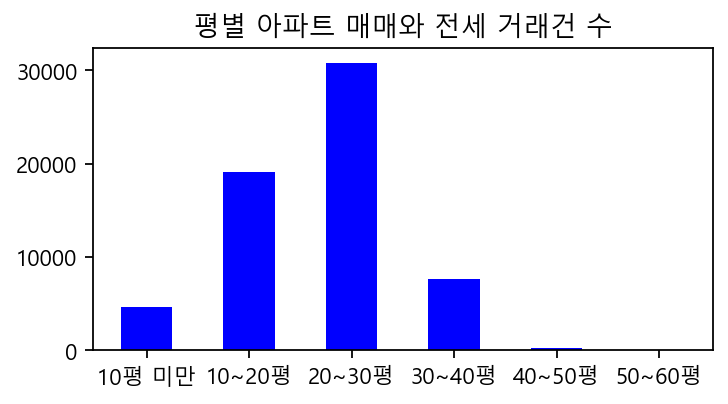

In [95]:
up=apart.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 아파트 매매와 전세 거래건 수'
plt.title(a)
plt.savefig(a+'.png')

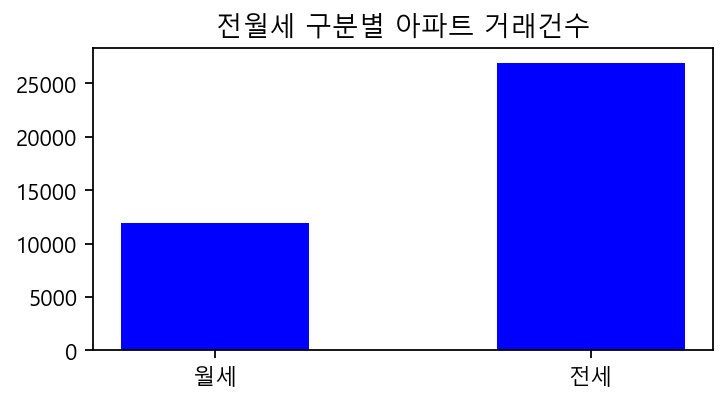

In [96]:
up=data_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전월세 구분별 아파트 거래건수'
plt.title(a)
plt.savefig(a+'.png')

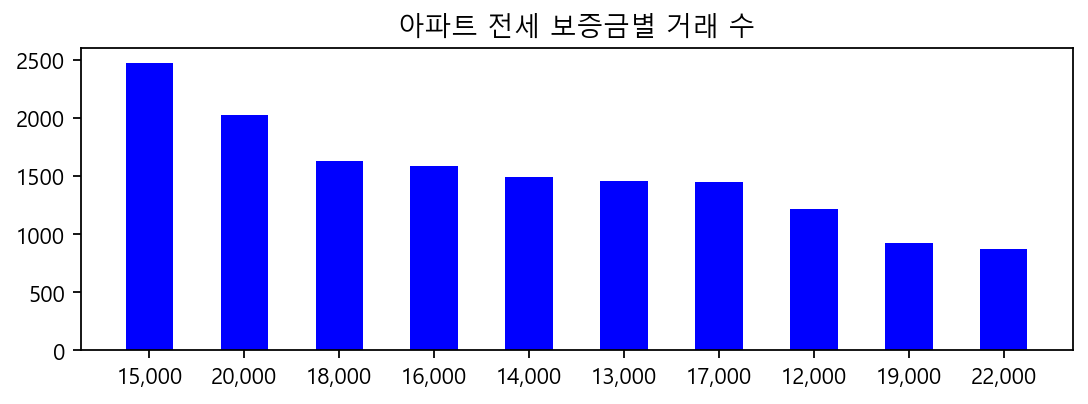

In [97]:
data_jeon=data_jeon[data_jeon['전월세구분']=='전세']
up=data_jeon.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(8,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='아파트 전세 보증금별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

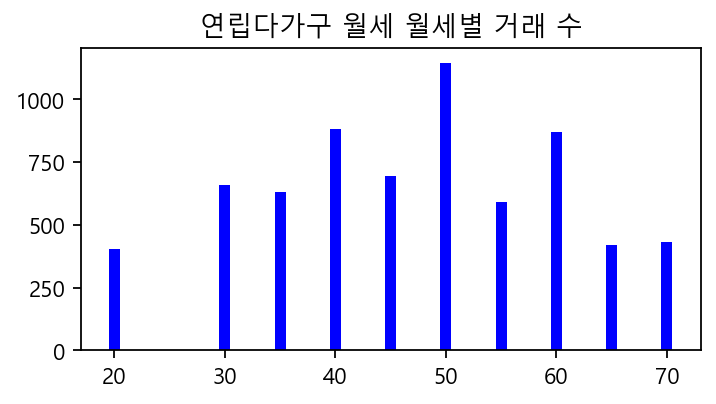

In [105]:
up=data_jeon[data_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=1,color="blue")
a='연립다가구 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 연립 전월세

In [106]:
yata_jeon = pd.read_csv('8.세종시_연립다세대(전월세)_실거래가.csv')
yata_jeon["평"]=yata_jeon["전용면적(㎡)"].apply(pyeong)

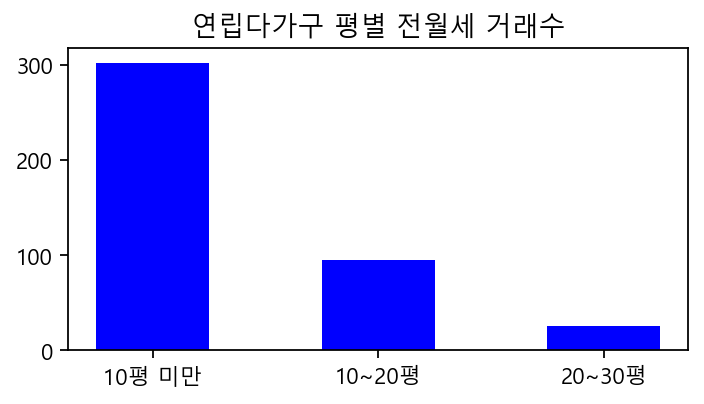

In [107]:
up=yata_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 평별 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

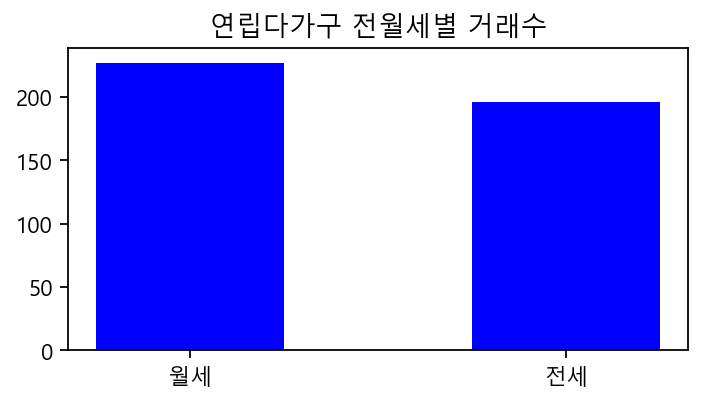

In [108]:
up=yata_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 전월세별 거래수'
plt.title(a)
plt.savefig(a+'.png')

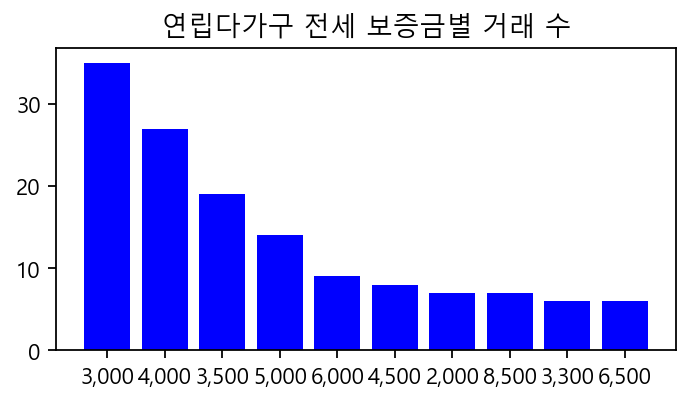

In [109]:
up=yata_jeon[yata_jeon['전월세구분']=='전세']
up=up.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.8,color="blue")
a='연립다가구 전세 보증금별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

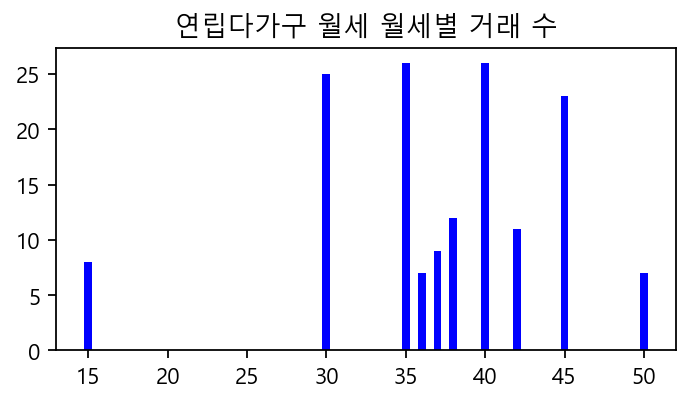

In [110]:
up=yata_jeon[yata_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 단독 전월세

In [111]:
danta_jeon = pd.read_csv('9.세종시_단독다가구(전월세)_실거래가.csv')
danta_jeon["평"]=danta_jeon["계약면적(㎡)"].apply(pyeong)

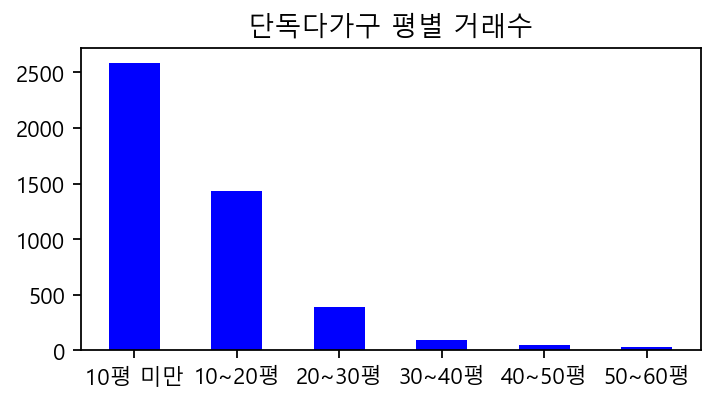

In [112]:
up=danta_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 평별 거래수'
plt.title(a)
plt.savefig(a+'.png')

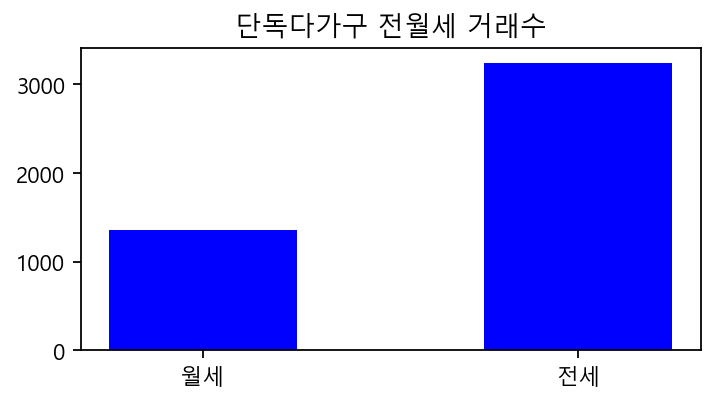

In [113]:
up=danta_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

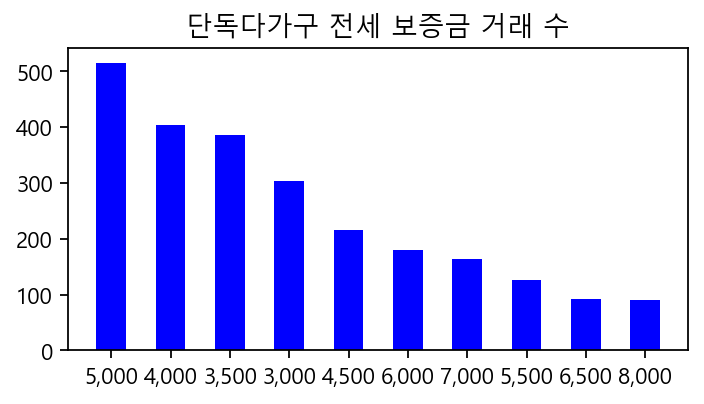

In [114]:
danta_jeon.groupby('보증금(만원)').count()
up=danta_jeon[danta_jeon['전월세구분']=='전세']
up=up.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 전세 보증금 거래 수'
plt.title(a)
plt.savefig(a+'.png')

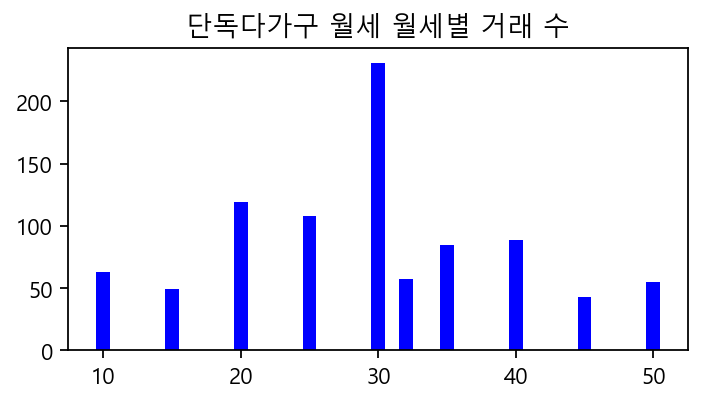

In [115]:
danta_jeon.groupby('월세(만원)').count()
up=danta_jeon[danta_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=1,color="blue")
a='단독다가구 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 오피스텔 전월세

In [116]:
oata_jeon = pd.read_csv('10.세종시_오피스텔(전월세)_실거래가.csv')
oata_jeon["평"]=oata_jeon["전용면적(㎡)"].apply(pyeong)

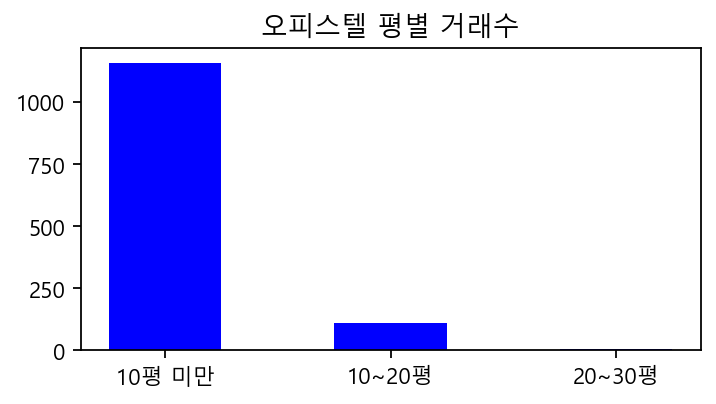

In [117]:
up=oata_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 평별 거래수'
plt.title(a)
plt.savefig(a+'.png')

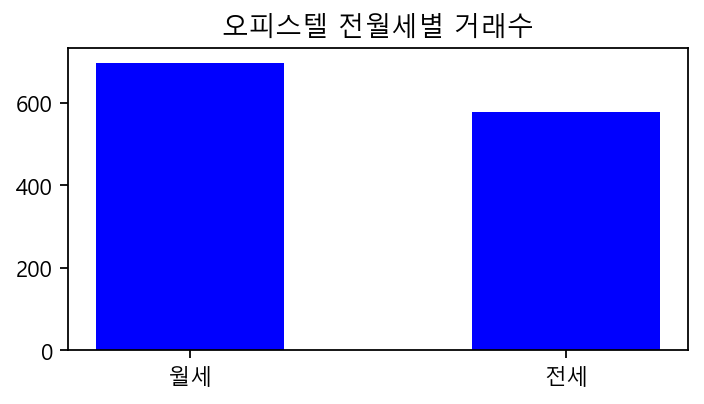

In [118]:
up=oata_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 전월세별 거래수'
plt.title(a)
plt.savefig(a+'.png')

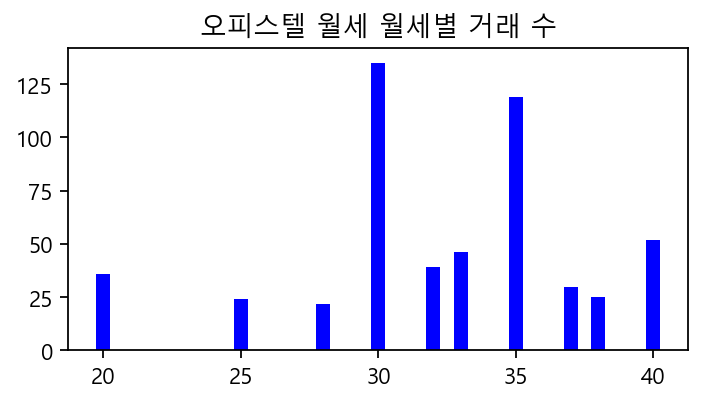

In [119]:
up=oata_jeon[oata_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [121]:
data_jeon_all = pd.concat([data_jeon,yata_jeon,danta_jeon,oata_jeon], ignore_index=True)

In [122]:
data_jeon_all['계약년월']=data_jeon_all['계약년월'].astype(str)
data_jeon_all['계약월']=data_jeon_all['계약년월'].apply(mon)

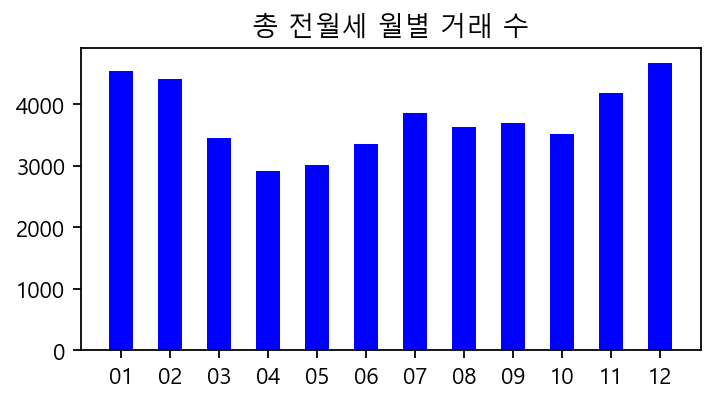

In [123]:
up=data_jeon_all.groupby('계약월').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='총 전월세 월별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [124]:
data_jeon_all['계약년']=data_jeon_all['계약년월'].apply(year)

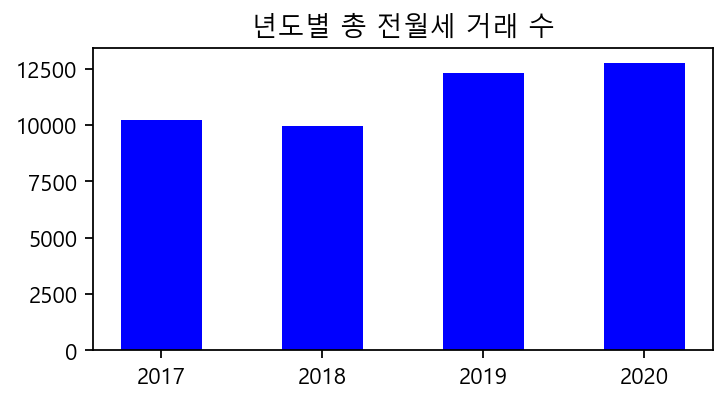

In [125]:
up=data_jeon_all.groupby('계약년').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='년도별 총 전월세 거래 수'
plt.title(a)
plt.savefig(a+'.png')

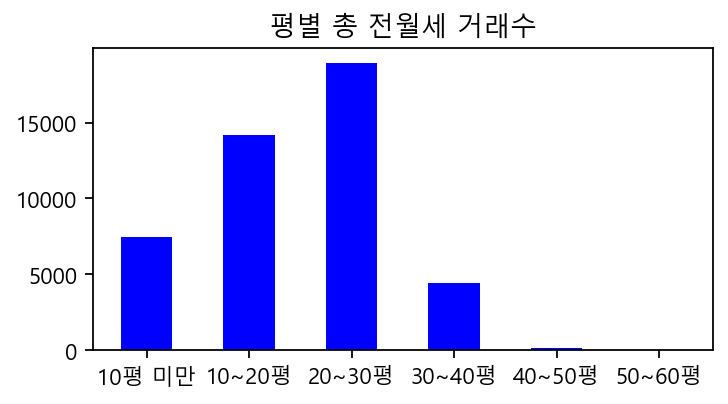

In [126]:
up=data_jeon_all.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 총 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

### 토지매매 실거래

In [127]:
tata = pd.read_csv('12.세종시_토지(매매)_실거래가.csv')
tata["평"]=tata["계약면적(㎡)"].apply(pyeong2)

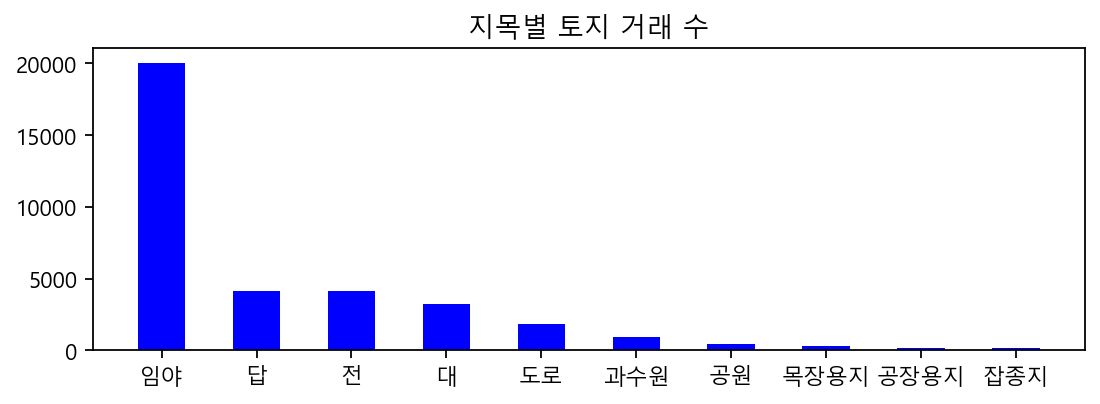

In [128]:
up=tata.groupby('지목').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(8,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='지목별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

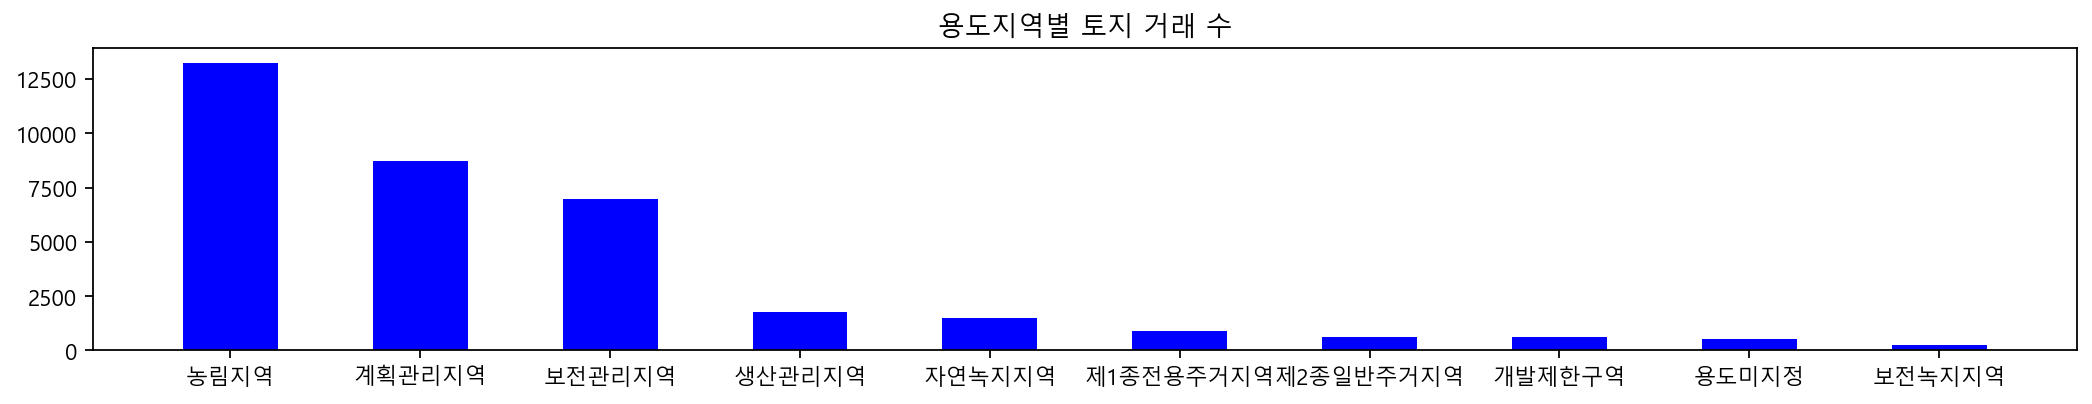

In [129]:
up=tata.groupby('용도지역').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(16,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='용도지역별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

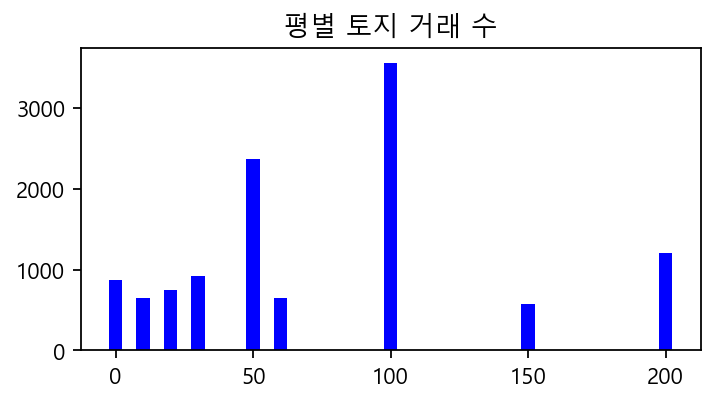

In [137]:
up=tata.groupby('평').count()
up=up.sort_values(by='계약년월',ascending=False)[:9]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=5,color="blue")
a='평별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 분양권 실거래가

In [131]:
bunta = pd.read_csv('13.세종시_분양권_실거래가.csv')
bunta["평"]=bunta["전용면적(㎡)"].apply(pyeong)

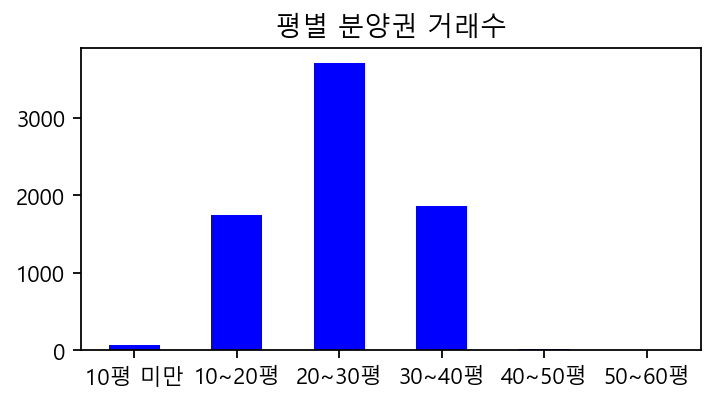

In [132]:
up=bunta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 분양권 거래수'
plt.title(a)
plt.savefig(a+'.png')

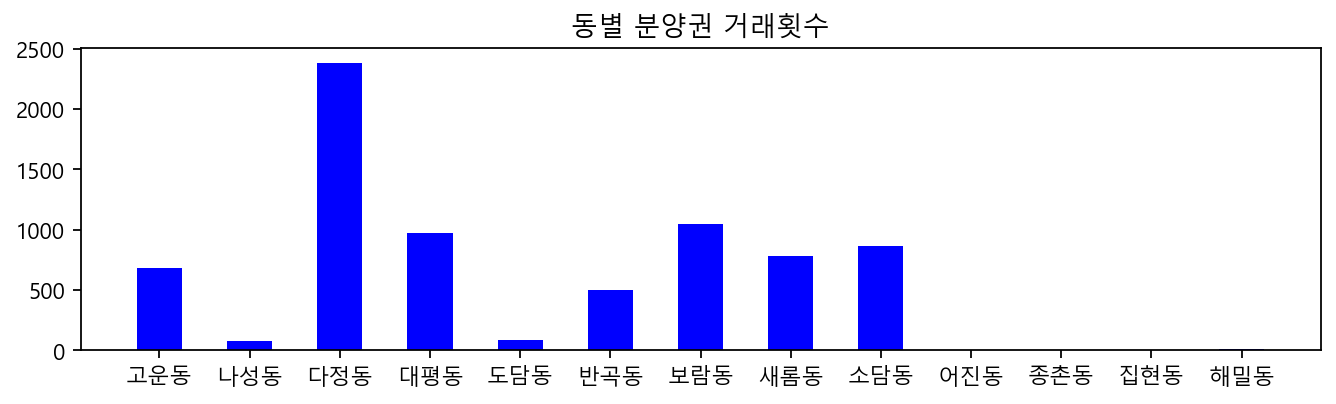

In [150]:
bunta2=bunta
bunta2['동']=bunta2['시군구'].apply(sort_dong2)
up=bunta2.groupby('동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(10,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 분양권 거래횟수'
plt.title(a)
plt.savefig(a+'.png')